In [1]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#Import Packages
import pandas as pd
import numpy as np
from scipy.stats import uniform # for training-and-test split
import statsmodels.api as sm # statistical models (including regression)
import statsmodels.formula.api as smf # R-like model specification
import matplotlib.pyplot as plt # 2D plotting
import seaborn as sns # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
from pathlib import Path # for merging dataframes
from sklearn.preprocessing import LabelEncoder #to numberize columns
from sklearn.preprocessing import OneHotEncoder #another way to numberize object columns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#import required packages
import re
from pprint import pprint
import nltk; nltk.download('stopwords')
import sklearn
import datetime
from datetime import datetime, timedelta
from pandas import DataFrame
import sys
! {sys.executable} -m pip install progress #progress bars
from progress.bar import Bar

pd.set_option("display.max_colwidth", 200)

#gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy for lemmatization
import sys
! {sys.executable} -m pip install spacy
! {sys.executable} -m pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
import spacy 


#from spacy_langdetect import LanguageDetector
#nlp = spacy.load('en')
#nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

# Plotting tools
! {sys.executable} -m pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

## J_Data


In [70]:
#COMPANY J
#read in data

j_data = pd.read_csv('/content/gdrive/Shareddrives/IST 718 Project/j_data_BoolOut.csv') #with boolean indicating outlier
j_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,8,10,11,13,15,18,19,20,25,29,30,31,33,35,36,38,39,40,42,43,45,53,54,55,56,57,58,59,60,65,67,68,69,70,72,73,74,75,76,77,78,86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,number,opened_at,incident_state,sys_updated_by,category,short_description,caller_id.location,assignment_group,u_time_last_workgroup_first_se,u_resolution_rejected_report,u_resolution_rejected,u_rejected_from_assignedto,u_reject_count,u_last_transfer_time,u_last_incident_state,u_last_assignment_group,u_initial_support_group,u_initial_priority,u_incident_rejected,urgency,sys_mod_count,sys_updated_on,time_worked,u_time_resolved,sys_class_name,u_task_state,state,severity,priority,u_pending_reminder_sent,u_pending_user_last_workgroup_,u_operational_task,u_notify_caller_update,notify,u_new_requirement,made_sla,u_last_service_call_update,u_last_priority,...,sys_domain,sla_due,sys_created_by,sys_created_on,contact_type,u_contact_windows_team,u_contact_unix_team,u_contact_unified_messaging_te,u_contact_network_team,u_contact_foundation_team,u_contact_dba_team,u_contact_client_technology_gr,u_close_code,bus_dur_num,activity_due,active,assigned_to,subcategory,reassignment_count,expected_start,parent,due_date,closed_by,closed_at,work_end,request_item,request,TicketDuration,ExpectedTaskDuration,TaskDuration,CloseWorkDiff,TotalSlaDuration,ULastWorkgroupDuration,TimeFirstTransfer,PendingUserDuration,Pending3rdPartyDuration,CalendarDuration,BusinessDuration,last_service_call_update_datetime,outlier
0,0,0,INC3148753,2020-06-09 20:46:00,Closed,system,Desktop or laptop,\tI have opened laptop refresh for more than 1 month and I have not received any updates.This is the ticket number REQ599157,"Sunnyvale, CA",ONSITE-AMERICAS,2020-06-10 18:45:00,Accepted Resolution,0.0,pthakur,0.0,2020-06-10 15:45:00,6.0,onsite-americas,itco,P3,False,2,6,2020-06-22 03:02:00,0,2020-06-11 17:26:00,Incident,Closed,Closed Complete,3 - Low,P3,False,81659.0,False,Yes,Do not notify,False,True,"Jun 22, 2020 00:02:12 system: Incident automatically closed after 10 days in the Resolved state.",P3,...,global,2020-06-24 05:03:00,neelamvijay,2020-06-09 20:46:00,Self-service,False,False,False,False,False,False,False,Resolved,713708,6/15/2020 18:45,False,ttruong,other,1,NaN,NaN,NaN,NaN,2020-06-22 03:02:00,NaN,NaN,NaN,1 days 20:40:00,NaN,NaN,NaN,2:59:54,2:59:54,18:58:54,22:40:59,0:00:00,"12 days, 6:15:17","8 days, 6:15:08",2020-06-22 00:02:12,False
1,1,1,INC2960955,2020-02-04 07:46:00,Closed,system,Easy connect,I can't seem to connect via Pulse anymore with my MAC. This was working just fine yesterday. It is giving me invalid certificate. Are there some instructions I can follow?,"Westford, MA",ONSITE-AMERICAS,2020-02-04 09:55:00,Accepted Resolution,0.0,talmquist,0.0,2020-02-04 07:47:00,6.0,onsite-americas,onsite-americas,P3,False,2,4,2020-02-15 03:03:00,0,2020-02-04 14:18:00,Incident,Closed,Closed Complete,3 - Low,P3,False,0.0,False,Yes,Do not notify,False,True,"Feb 15, 2020 00:03:26 system: Incident automatically closed after 10 days in the Resolved state.",P3,...,global,2020-02-19 13:28:00,talmquist,2020-02-04 07:47:00,Incident Form,False,False,False,False,False,False,False,Resolved,735188,UNKNOWN,False,ccoffee,report an issue,0,NaN,NaN,NaN,NaN,2020-02-15 03:03:00,NaN,NaN,NaN,0 days 06:32:00,NaN,NaN,NaN,6:30:39,2:07:36,0:00:00,0:00:00,0:00:00,"10 days, 19:16:42","8 days, 12:13:08",2020-02-15 00:03:26,False
2,2,2,INC3131802,2020-05-27 11:06:00,Closed,system,Desktop or laptop,""" i"" key not working : virtual keyboard works fine","Houston, TX",ONSITE-AMERICAS,2020-05-27 12:43:00,Accepted Resolution,0.0,pthakur,0.0,2020-05-27 12:27:00,4.0,onsite-americas,onsite-americas,P3,False,2,6,2020-06-07 03:02:00,2,2020-06-07 03:02:00,Incident,Closed,Closed Complete,3 - Low,P3,True,915534.0,False,Yes,Do not notify,False,True,"Jun 07, 2020 00:02:12 system: Incident automatically closed after 10 days in the Pending (User) state.",P3,...,global,2020-06-10 18:23:00,pthakur,2020-05-27 12:27:00,Incident Form,False,False,False,False,False,False,False,Cancelled,636783,6/6/2020 12:43,False,tdefranco,desktop / laptop hardware issue,0,NaN,NaN,NaN,NaN,2020-06-07 03:02:00,NaN,NaN,

In [110]:
#WRITE FUNCTION 3
#run third
#----- df = a_data or j_data
#----- user = UN from assigned_to (optional- if not defined will return cost for all employees)
#----- rate = hourly wage. Default $40 for USA
def get_cost(df, user=None, rate=40):
  #Convert to Staffing Schedule
  df_tmp = df[['bus_dur_num', 'sys_mod_count', 'assigned_to']]
  tech_cost = {}

  if user==None:
    user_list = np.unique(df_tmp['assigned_to'].astype(str))

    for us in user_list:
      df_tmp2 = df_tmp[df_tmp['assigned_to']==us]
      dur = (df_tmp2['bus_dur_num'].mean()/60/60)
      count = len(df_tmp2)
      sys = df_tmp2['sys_mod_count'].mean()

      cost = ((((dur/sys)*count)/8)*rate)
      
      tech_cost[us] = cost

  else:
    df_tmp = df_tmp[df_tmp['assigned_to']==user]
    dur = (df_tmp['bus_dur_num'].mean()/60/60)
    count = len(df_tmp)
    sys = df_tmp['sys_mod_count'].mean()

    cost = ((((dur/sys)*count)/8)*rate)
    
    tech_cost[user] = cost
  

  return tech_cost

In [117]:
avg_dur = 9.36
rate = 40

avg_cost = ((((avg_dur)))*rate)/5
avg_cost

74.88

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 <a list of 41 Text major ticklabel objects>)

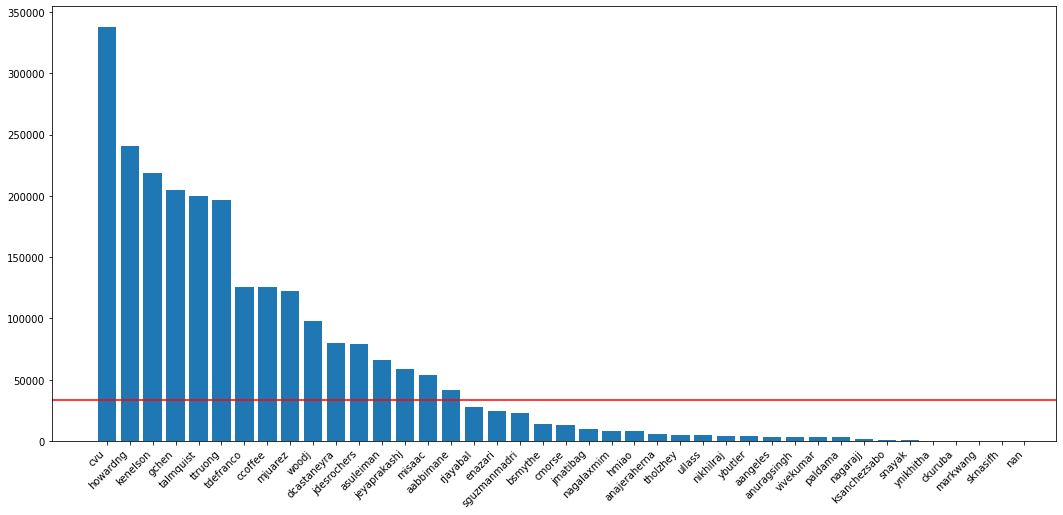

In [124]:


j_data['opened_at'] = pd.to_datetime(j_data.opened_at)
j_data['date'] = j_data['opened_at'].dt.strftime('%Y-%m-%d')
total_days = len(np.unique(j_data['date']))

tech_cost_dict = get_cost(j_data)

techs = pd.DataFrame()
tech = []
expense = []

for key, value in tech_cost_dict.items():
  tech.append(key)
  expense.append(value)

techs['tech'] = tech
techs['cost'] = expense

y_line = avg_cost*total_days

techs = techs.sort_values('cost', ascending=False)
fig, ax = plt.subplots(figsize=(18,8))
plt.bar(techs['tech'], techs['cost'])
plt.axhline(y=y_line, color='red')
plt.xticks(rotation=45, ha='right')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

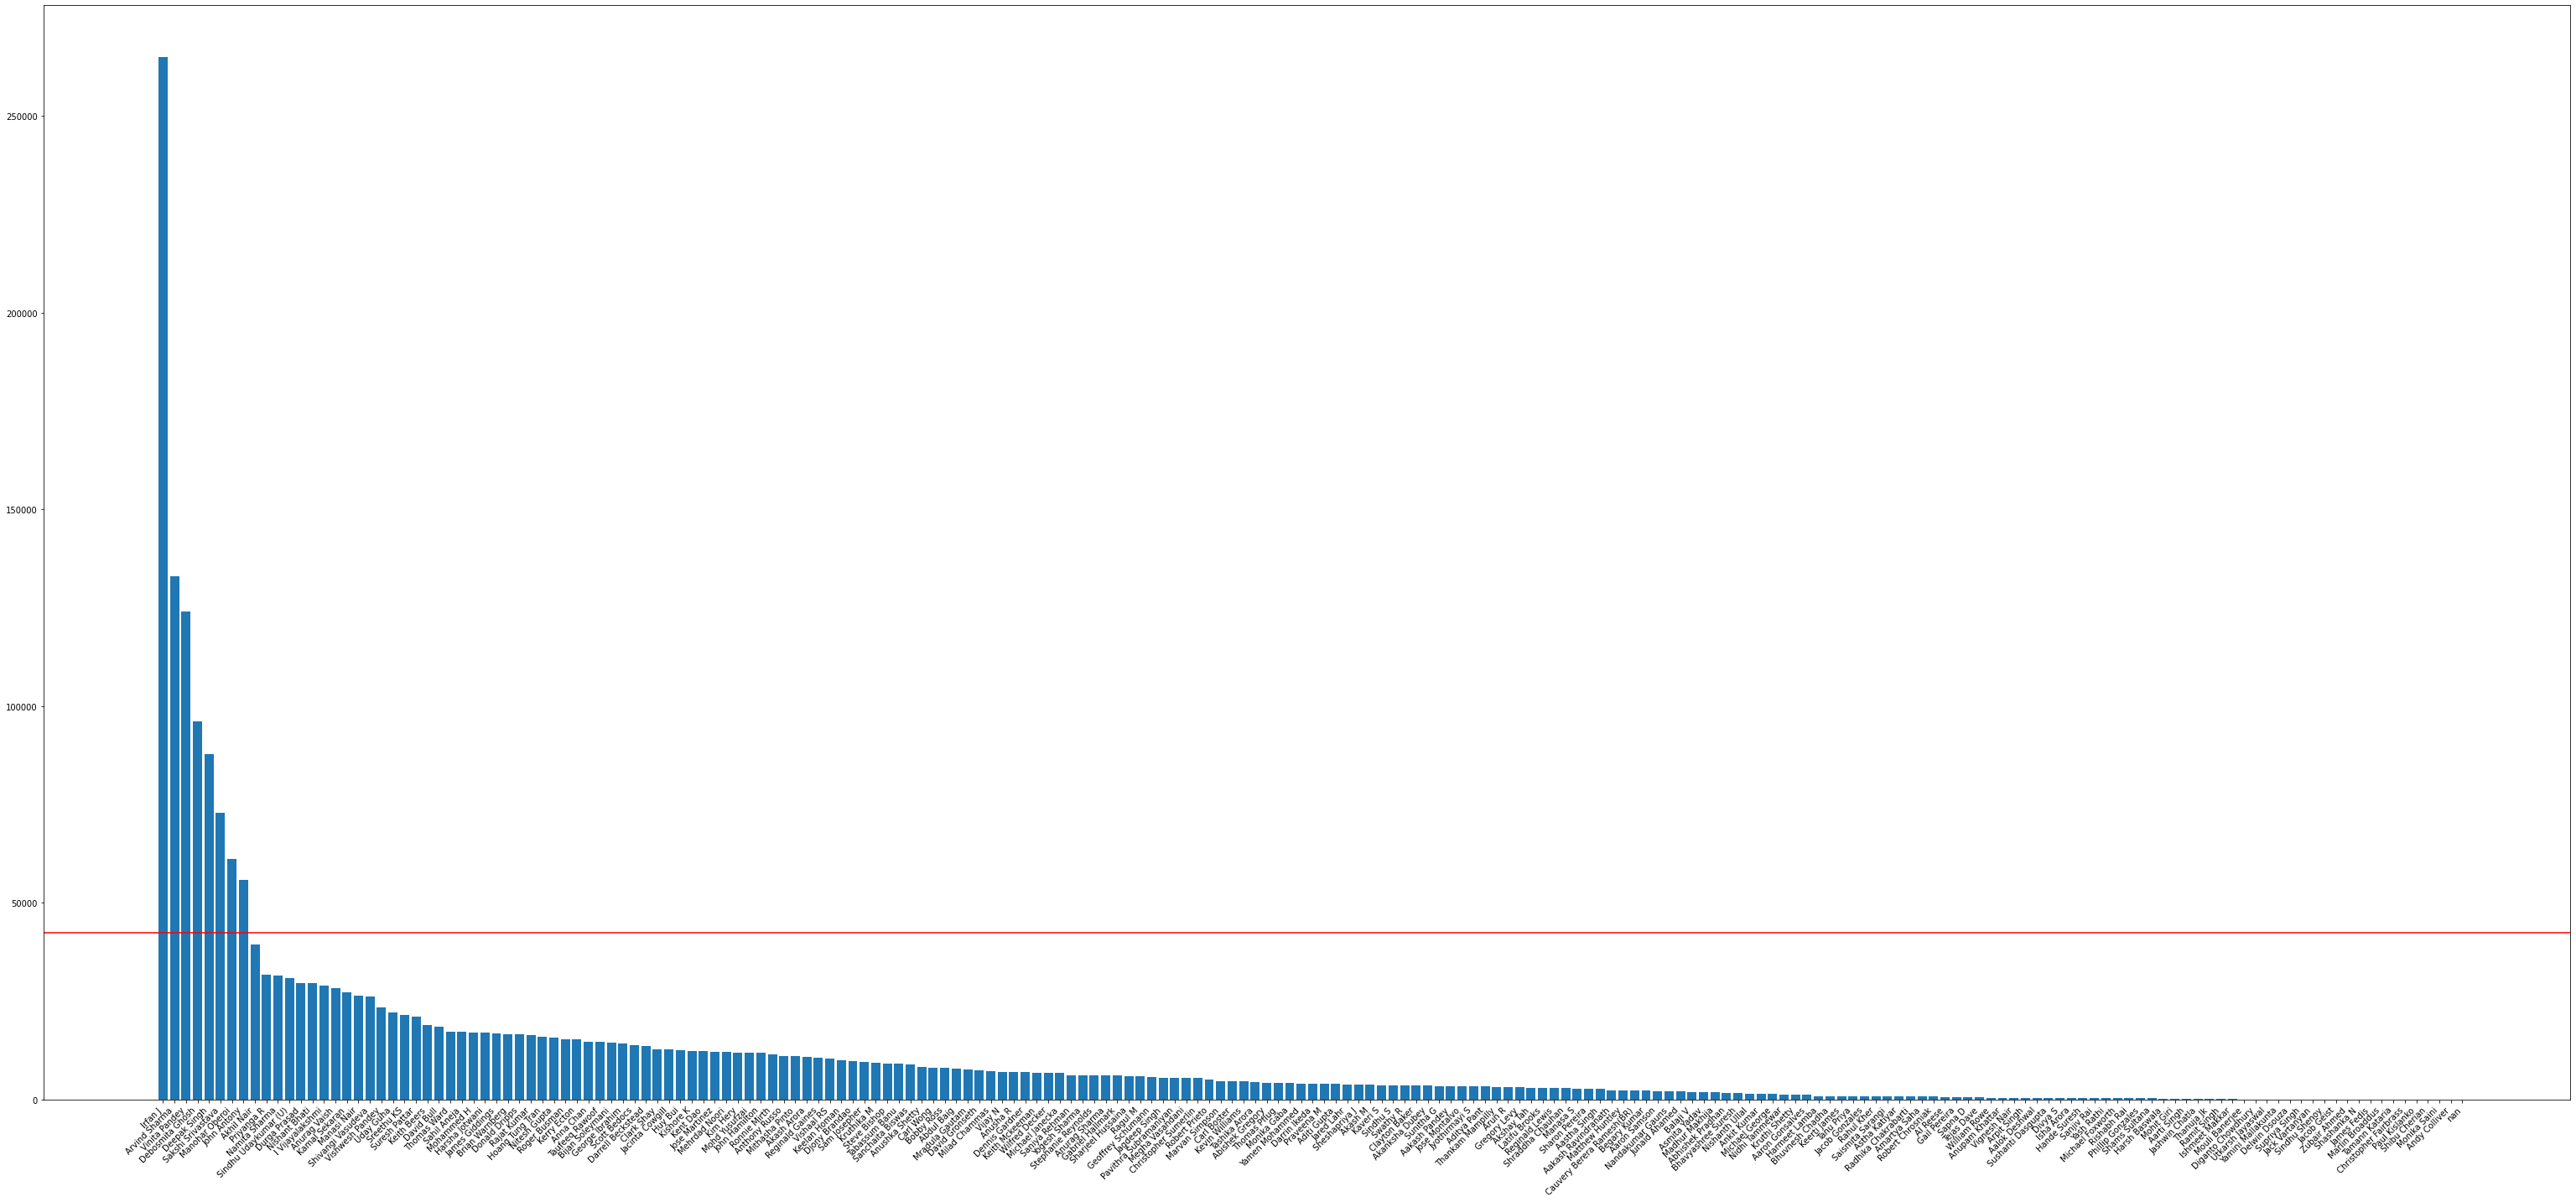

In [128]:


a_data['opened_at'] = pd.to_datetime(a_data.opened_at)
a_data['date'] = a_data['opened_at'].dt.strftime('%Y-%m-%d')
total_days = len(np.unique(a_data['date']))

tech_cost_dict = get_cost(a_data)

techs = pd.DataFrame()
tech = []
expense = []

for key, value in tech_cost_dict.items():
  tech.append(key)
  expense.append(value)

techs['tech'] = tech
techs['cost'] = expense

y_line = avg_cost*total_days

techs = techs.sort_values('cost', ascending=False)
fig, ax = plt.subplots(figsize=(54,24))
plt.bar(techs['tech'], techs['cost'])
plt.axhline(y=y_line, color='red')
plt.xticks(rotation=45, ha='right', fontsize=10 )


,tech,cost
0,aabbimane,42040.928123
1,aangeles,3599.815993
2,anajeraherna,5460.800017
3,anuragsingh,3447.374207
4,asuleiman,66420.142440
5,bsmythe,13766.658909
6,ccoffee,125445.489815
7,ckuruba,205.493403
8,cmorse,13341.911662
9,cvu,337711.638460


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 <a list of 41 Text major ticklabel objects>)

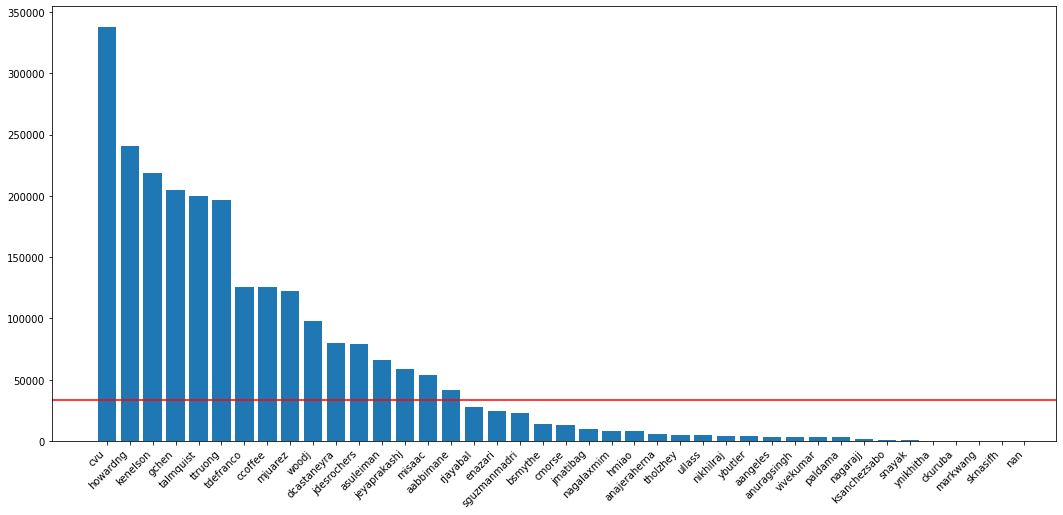

In [123]:
#techs = techs.drop('nan', axis=0) #drop nan

y_line = avg_cost*total_days

techs = techs.sort_values('cost', ascending=False)
fig, ax = plt.subplots(figsize=(18,8))
plt.bar(techs['tech'], techs['cost'])
plt.axhline(y=y_line, color='red')
plt.xticks(rotation=45, ha='right')

In [88]:
df_tmp = j_data[['bus_dur_num', 'sys_mod_count', 'assigned_to']]
user_list = np.unique(df_tmp['assigned_to'].astype(str))
tech_cost = {}

for us in user_list:
      df_tmp2 = df_tmp[df_tmp['assigned_to']==us]
      dur = (df_tmp2['bus_dur_num'].mean()/60/60)
      count = len(df_tmp2)
      sys = df_tmp2['sys_mod_count'].mean()

      cost = ((((dur/sys)*count)/8)*40)
      tech_cost[us] = cost

tech_cost

{'aabbimane': 42040.928122809855,
 'aangeles': 3599.8159932659937,
 'anajeraherna': 5460.8000167336,
 'anuragsingh': 3447.3742069423683,
 'asuleiman': 66420.14243997404,
 'bsmythe': 13766.658908770165,
 'ccoffee': 125445.48981525657,
 'ckuruba': 205.49340277777776,
 'cmorse': 13341.911661735703,
 'cvu': 337711.6384597537,
 'dcastaneyra': 80339.47998756665,
 'enazari': 24704.040904471545,
 'gchen': 204793.5053337406,
 'hmiao': 7874.169218346255,
 'howardng': 240799.12541853628,
 'jdesrochers': 79089.43849090455,
 'jeyaprakashj': 58701.79821477738,
 'jmatibag': 10196.546064814815,
 'kenelson': 218622.74362617187,
 'ksanchezsabo': 1169.5926418439715,
 'markwang': 146.250505050505,
 'misaac': 53824.70790859386,
 'mjuarez': 122493.16463903744,
 'nagalaxmim': 7917.037594428707,
 'nagarajj': 1435.462037037037,
 'nan': nan,
 'nikhilraj': 4554.003646528707,
 'paldama': 3433.0978040540544,
 'rjayabal': 27827.56886618516,
 'sguzmanmadri': 23247.808988551267,
 'sknasifh': 141.43555555555557,
 'sna

In [4]:
j_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'number', 'opened_at', 'incident_state',
       'sys_updated_by', 'category', 'short_description', 'caller_id.location',
       'assignment_group', 'u_time_last_workgroup_first_se',
       'u_resolution_rejected_report', 'u_resolution_rejected',
       'u_rejected_from_assignedto', 'u_reject_count', 'u_last_transfer_time',
       'u_last_incident_state', 'u_last_assignment_group',
       'u_initial_support_group', 'u_initial_priority', 'u_incident_rejected',
       'urgency', 'sys_mod_count', 'sys_updated_on', 'time_worked',
       'u_time_resolved', 'sys_class_name', 'u_task_state', 'state',
       'severity', 'priority', 'u_pending_reminder_sent',
       'u_pending_user_last_workgroup_', 'u_operational_task',
       'u_notify_caller_update', 'notify', 'u_new_requirement', 'made_sla',
       'u_last_service_call_update', 'u_last_priority',
       'u_last_assignment_time', 'impact', 'u_incnumber', 'u_escalation_level',
       'escalation', 'u_enhanc

In [10]:

keep_columns = ['number', 'opened_at', 'category', 'assignment_group', 'u_initial_priority', 'sys_mod_count', 
                'contact_type', 'bus_dur_num', 'assigned_to', 'subcategory', 'reassignment_count',
                'BusinessDuration', 'outlier'] #use these columns for analysis

#add month, day, and time of day columns
j_brief = j_data[keep_columns]
j_brief['opened_at'] = pd.to_datetime(j_brief['opened_at'], errors = 'coerce')
j_brief['month'] = j_brief['opened_at'].dt.month #get month 0-12
j_brief['day'] = j_brief['opened_at'].dt.weekday #get day 0-31
j_brief['hour'] = j_brief['opened_at'].dt.hour #get hour 0-24
j_brief = j_brief.drop('opened_at', axis=1)
j_brief['category'] = j_brief['category'].replace(np.nan, 'Task') #give tasks category 'task'
j_brief['subcategory'] = j_brief['subcategory'].replace(np.nan, 'Task') #give tasks subcategory 'task'
j_brief['u_initial_priority'] = j_brief['u_initial_priority'].replace(np.nan, 'P5') #give tasks subcategory 'task'

'''#split incidents/tasks
num_list = j_brief['number']
check = 'T'
task_list = [idx for idx in num_list if idx[0].lower() == check.lower()]
j_tasks = j_brief[j_brief['number'].isin(task_list)] #isolate tasks
check = 'I'
task_list = [idx for idx in num_list if idx[0].lower() == check.lower()]
j_incidents = j_brief[j_brief['number'].isin(task_list)] #isolate incidents'''
j_incidents = j_brief
j_incidents

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,number,category,assignment_group,u_initial_priority,sys_mod_count,contact_type,bus_dur_num,assigned_to,subcategory,reassignment_count,BusinessDuration,outlier,month,day,hour
0,INC3148753,Desktop or laptop,ONSITE-AMERICAS,P3,6,Self-service,713708,ttruong,other,1,"8 days, 6:15:08",False,6,1,20
1,INC2960955,Easy connect,ONSITE-AMERICAS,P3,4,Incident Form,735188,ccoffee,report an issue,0,"8 days, 12:13:08",False,2,1,7
2,INC3131802,Desktop or laptop,ONSITE-AMERICAS,P3,6,Incident Form,636783,tdefranco,desktop / laptop hardware issue,0,"7 days, 8:53:03",False,5,2,11
3,INC3245966,Desktop or laptop,IT-INFRA-CTG,P3,7,Incident Form,2132001,ullass,other,1,"24 days, 16:13:21",False,9,0,3
4,INC3240754,Application support,IT-INFRA-CTG,P3,3,Self-service,361,NaN,provide access,1,0:06:01,False,9,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17094,TASK567662,Task,ONSITE-AMERICAS,P5,4,Incident Form,11617,asuleiman,Task,0,3:13:37,False,10,1,16
17095,TASK567747,Task,ONSITE-AMERICAS,P5,4,Incident Form,184058,howardng,Task,0,"2 days, 3:07:38",False,10,2,11
17096,TASK567934,Task,ONSITE-AMERICAS,P5,7,Incident Form,90810,howardng,Task,0,"1 day, 1:13:30",False,10,3,17
17097,TASK567939,Task,ONSITE-AMERICAS,P5,5,Incident Form,148928,aangeles,Task,0,"1 day, 17:22:08",False,10,3,18


In [8]:
#Prepare Categorical Variable Encoding
print('Unique Values of Priority in Incidents')
print(np.unique(j_incidents['u_initial_priority']))

print('-----------------------------------')
print('Unique Values of Sys_Mod_Count in Incidents')
print(np.unique(j_incidents['sys_mod_count']))

print('-----------------------------------')
print('Unique Values of Contact Type in Incidents')
print(np.unique(j_incidents['contact_type']))

print('-----------------------------------')
print('Unique Values of Assigned User in Incidents')
print(np.unique(j_incidents['assigned_to'].astype(str)))

print('-----------------------------------')
print('Unique Values of Reassignment Count in Incidents')
print(np.unique(j_incidents['reassignment_count']))

print('-----------------------------------')
print('Unique Values of Subcategory in Incidents')
print(np.unique(j_incidents['subcategory']))

print('-----------------------------------')
print('Unique Values of Category in Incidents')
print(np.unique(j_incidents['category']))

print('-----------------------------------')
print('Unique Values of Assignment Group in Incidents')
print(np.unique(j_incidents['assignment_group']))

print('-----------------------------------')


Unique Values of Priority in Incidents
['P2' 'P3' 'P4' 'P5']
-----------------------------------
Unique Values of Sys_Mod_Count in Incidents
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 62 63 66 74 75 76 85 99]
-----------------------------------
Unique Values of Contact Type in Incidents
['CM-self-service' 'Email' 'Incident Form' 'Phone' 'Self-service']
-----------------------------------
Unique Values of Assigned User in Incidents
['aabbimane' 'aangeles' 'anajeraherna' 'anuragsingh' 'asuleiman' 'bsmythe'
 'ccoffee' 'ckuruba' 'cmorse' 'cvu' 'dcastaneyra' 'enazari' 'gchen'
 'hmiao' 'howardng' 'jdesrochers' 'jeyaprakashj' 'jmatibag' 'kenelson'
 'ksanchezsabo' 'markwang' 'misaac' 'mjuarez' 'nagalaxmim' 'nagarajj'
 'nan' 'nikhilraj' 'paldama' 'rjayabal' 'sguzmanmadri' 'sknasifh' 'snayak'
 'talmquist' 'tdefranco' 'tholzhey' 'ttruong' 'ullass' 'vivekumar'

In [11]:
#assignment_group
assignmentgroup_map = {'IT-INFRA-CTG':1, 'ONSITE-AMERICAS':2}
#contact_type
contacttype_map = {'CM-self-service':1, 'Email':2, 'Incident Form':3, 'Phone':4, 'Self-service':5}
#category
category_map = {'Access and passwords':1, 'Application support':2,
 'Collaboration and content tools':3, 'Customer Success Business Management':4,
 'Desktop or laptop':5, 'Easy connect':6, 'Email / Calendar':7, 'Engineering':8,
 'Finance':9, 'ININ (Contact Center service)':10, 'Infrastructure Monitoring':11,
 'Infrastructure services':12, 'Microsoft Skype services':13,
 'Mobility devices and services':14, 'Printers and peripherals':15, 'Software':16,
 'Telephone & Conference (Audio, Video)':17, 'Task':18}
#outlier
outlier_map = {True:1, False:0}
#u_initial_priority
priority_map = {'P2':2, 'P3':3, 'P4':4}

'''#incidents
j_incidents['u_initial_priority'] = j_incidents['u_initial_priority'].map({'P2':2, 'P3':3, 'P4':4})
j_incidents['outlier'] = j_incidents['outlier'].map(outlier_map)
j_incidents['assignment_group'] = j_incidents['assignment_group'].map(assignmentgroup_map)
j_incidents['contact_type'] = j_incidents['contact_type'].map(contacttype_map)
j_incidents['category'] = j_incidents['category'].map(category_map)


#tasks
j_tasks['outlier'] = j_tasks['outlier'].map(outlier_map)
j_tasks['assignment_group'] = j_tasks['assignment_group'].map(assignmentgroup_map)
j_tasks['contact_type'] = j_tasks['contact_type'].map(contacttype_map)'''

j_incidents['y'] = j_incidents['outlier'].map(outlier_map)

#Dummy Variables
cat_vars=['category', 'assignment_group', 'u_initial_priority',
       'contact_type', 'assigned_to',
       'subcategory', 
       'month', 'day']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(j_incidents[var], prefix=var)
    data1=j_incidents.join(cat_list)
    j_incidents=data1
cat_vars=['category', 'assignment_group', 'u_initial_priority',
       'contact_type', 'assigned_to',
       'subcategory', 
       'month', 'day']
data_vars=j_incidents.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]



In [24]:
data_final=j_incidents[to_keep]
len(data_final.columns.values)

174

In [16]:
#j_tasks = j_tasks.drop(['category', 'subcategory','reassignment_count', 'u_initial_priority'], axis=1) #drop useless task columns
data_final = data_final.drop(['number','sys_mod_count', 'bus_dur_num', 'reassignment_count', 'BusinessDuration', 'outlier', 'hour'], axis=1)
data_final

,y,category_Access and passwords,category_Application support,category_Collaboration and content tools,category_Customer Success Business Management,category_Desktop or laptop,category_Easy connect,category_Email / Calendar,category_Engineering,category_Finance,category_ININ (Contact Center service),category_Infrastructure Monitoring,category_Infrastructure services,category_Microsoft Skype services,category_Mobility devices and services,category_Printers and peripherals,category_Software,category_Task,"category_Telephone & Conference (Audio, Video)",assignment_group_IT-INFRA-CTG,assignment_group_ONSITE-AMERICAS,u_initial_priority_P2,u_initial_priority_P3,u_initial_priority_P4,u_initial_priority_P5,contact_type_CM-self-service,contact_type_Email,contact_type_Incident Form,contact_type_Phone,contact_type_Self-service,assigned_to_aabbimane,assigned_to_aangeles,assigned_to_anajeraherna,assigned_to_anuragsingh,assigned_to_asuleiman,assigned_to_bsmythe,assigned_to_ccoffee,assigned_to_ckuruba,assigned_to_cmorse,assigned_to_cvu,...,subcategory_report lost or stolen device,subcategory_request a mobile device,subcategory_request access to an application,subcategory_run report/extract data,subcategory_server,subcategory_service,subcategory_sharepoint,subcategory_stream,subcategory_telephone & services,subcategory_telephone â request a new phone,subcategory_the core intranet,subcategory_training,subcategory_unix o/s,subcategory_vpn client issue,subcategory_windows,subcategory_wired connection,subcategory_wireless access,subcategory_workstation,subcategory_workstation issue,subcategory_yammer,subcategory_zoom,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
17095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
17096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
17097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


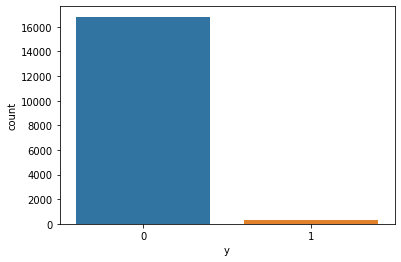

In [13]:
sns.countplot(x='y', data=j_incidents)
plt.show()


In [17]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  23570
Number of no subscription in oversampled data 11785
Number of subscription 11785
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [18]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
#ID variables to use

colsup = {}
count = 0

for col in data_final.columns.values:
  colsup[col] = rfe.support_[count]
  count = count + 1

colsup

logvars = []
for key, value in colsup.items():
  if value == True:
    logvars.append(key)

logvars

 
X=os_data_X[logvars]
y=os_data_y['y']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

[False  True False False  True False False False False False False False
 False False False False False  True False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False  True False False False False  True
  True  True  True False False False False False  True False False False
 False  True False False False  True False False False False False False
 False False False False  True  True False False False False False  True
 False False False False  True False False False False False False False
 False False  True False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

IndexError: ignored

In [26]:
logvars = []
for key, value in colsup.items():
  if value == True:
    logvars.append(key)

logvars

['category_Access and passwords',
 'category_Customer Success Business Management',
 'category_Task',
 'u_initial_priority_P3',
 'u_initial_priority_P4',
 'assigned_to_ynikhitha',
 "subcategory_can't access email",
 'subcategory_database',
 'subcategory_datacenter',
 'subcategory_desktop / laptop application issue',
 'subcategory_desktop / laptop hardware issue',
 'subcategory_enhance application',
 'subcategory_icmp',
 'subcategory_macintosh',
 'subcategory_onedrive for business',
 'subcategory_operating system issue',
 'subcategory_problem with access to an application',
 'subcategory_report a telephone issue',
 'subcategory_stream',
 'subcategory_unix o/s']

In [29]:
X

,category_Access and passwords,category_Customer Success Business Management,category_Task,u_initial_priority_P3,u_initial_priority_P4,assigned_to_ynikhitha,subcategory_can't access email,subcategory_database,subcategory_datacenter,subcategory_desktop / laptop application issue,subcategory_desktop / laptop hardware issue,subcategory_enhance application,subcategory_icmp,subcategory_macintosh,subcategory_onedrive for business,subcategory_operating system issue,subcategory_problem with access to an application,subcategory_report a telephone issue,subcategory_stream,subcategory_unix o/s
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23565,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23566,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
 
X=os_data_X[logvars]
y=os_data_y['y']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.401759
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
                                       Results: Logit
Model:                       Logit                     Pseudo R-squared:          0.420     
Dependent Variable:          y                         AIC:                       18976.9134
Date:                        2020-12-08 00:42          BIC:                       19130.2003
No. Observations:            23570                     Log-Likelihood:            -9469.5   
Df Model:                    18                        LL-Null:                   -16337.   
Df Residuals:                23551                     LLR p-value:               0.0000    
Converged:                   0.0000                    Scale:                     1.0000    
--------------------------------------------------------------------------------------------
                                                    Coef.   Std.Err.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


NameError: ignored

In [ ]:
#j_incidents['u_initial_priority'] = j_incidents.replace({np.nan:j_incidents['u_initial_priority'].mode()}) #replace with mode

#look for NaN values
print(j_incidents.isnull().sum())
print(j_tasks.isnull().sum())

print('The length of Incidents is:')
print(len(j_incidents))
print('The length of Tasks is:')
print(len(j_tasks))

number                 0
category               0
assignment_group       0
u_initial_priority     0
sys_mod_count          0
contact_type           0
bus_dur_num            0
assigned_to           24
subcategory            0
reassignment_count     0
BusinessDuration       0
outlier                0
month                  0
day                    0
hour                   0
dtype: int64
number              0
assignment_group    0
sys_mod_count       0
contact_type        0
bus_dur_num         0
assigned_to         2
BusinessDuration    0
outlier             0
month               0
day                 0
hour                0
dtype: int64
The length of Incidents is:
10048
The length of Tasks is:
7051


In [ ]:
#remove other NaN rows since so few observations
j_incidents = j_incidents.dropna(axis=0)
j_tasks = j_tasks.dropna(axis=0)

print('The length of Incidents is:')
print(len(j_incidents))
print('The length of Tasks is:')
print(len(j_tasks))

print(j_incidents.isnull().sum())
print(j_tasks.isnull().sum())

The length of Incidents is:
10024
The length of Tasks is:
7049
number                0
category              0
assignment_group      0
u_initial_priority    0
sys_mod_count         0
contact_type          0
bus_dur_num           0
assigned_to           0
subcategory           0
reassignment_count    0
BusinessDuration      0
outlier               0
month                 0
day                   0
hour                  0
dtype: int64
number              0
assignment_group    0
sys_mod_count       0
contact_type        0
bus_dur_num         0
assigned_to         0
BusinessDuration    0
outlier             0
month               0
day                 0
hour                0
dtype: int64


In [ ]:
j_incidents = j_incidents.drop(['assigned_to', 'subcategory', 'BusinessDuration', 'bus_dur_num', 'hour', 'day'], axis=1) #drop since too many cats
j_tasks = j_tasks.drop(['assigned_to', 'BusinessDuration', 'bus_dur_num', 'hour', 'day'], axis=1) #drop since too many cats

In [ ]:
#make sure DF is ready
j_incidents

,number,category,assignment_group,u_initial_priority,sys_mod_count,contact_type,reassignment_count,outlier,month
0,INC3148753,5,2,3,6,5,1,0,6
1,INC2960955,6,2,3,4,3,0,0,2
2,INC3131802,5,2,3,6,3,0,0,5
3,INC3245966,5,1,3,7,3,1,0,9
5,INC3256659,2,1,3,30,5,3,0,9
...,...,...,...,...,...,...,...,...,...
10043,INC2932513,11,1,4,10,3,1,0,1
10044,INC2886450,2,1,3,24,5,3,0,12
10045,INC3313633,16,1,3,16,5,1,0,10
10046,INC3080408,1,1,3,6,5,1,0,4


In [ ]:
#make sure DF is ready
j_tasks

,number,assignment_group,sys_mod_count,contact_type,outlier,month
10048,TASK463646,2,8,3,0,10
10049,TASK500072,2,3,3,0,6
10050,TASK503547,2,18,3,0,7
10051,TASK504553,2,5,3,0,7
10052,TASK502184,2,5,3,0,6
...,...,...,...,...,...,...
17094,TASK567662,2,4,3,0,10
17095,TASK567747,2,4,3,0,10
17096,TASK567934,2,7,3,0,10
17097,TASK567939,2,5,3,0,10


In [ ]:
#Split Tasks
X = j_tasks.drop(columns=['number', 'outlier']).values
Y = j_tasks['outlier'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (5639, 4)
X_test shape: (1410, 4)
Y_train shape: (5639,)
Y_test shape: (1410,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
dt= DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

print('Training Evaluation F1 Score:', f1_score(Y_train, dt_pred_train))

Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)
rfc_pred_train = rfc.predict(X_train)

print('Training Evaluation F1 Score:', f1_score(Y_train, rfc_pred_train))

Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [ ]:
for i in (number + 1 for number in range(len(category_map))):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


Category: ['Access and passwords']
X_train shape: (1726, 5)
X_test shape: (432, 5)
Y_train shape: (1726,)
Y_test shape: (432,)
Decision Tree--
Training Evaluation F1 Score: 0.2571428571428571
Random Forest--
Training Evaluation F1 Score: 0.2571428571428571


<Figure size 432x288 with 0 Axes>

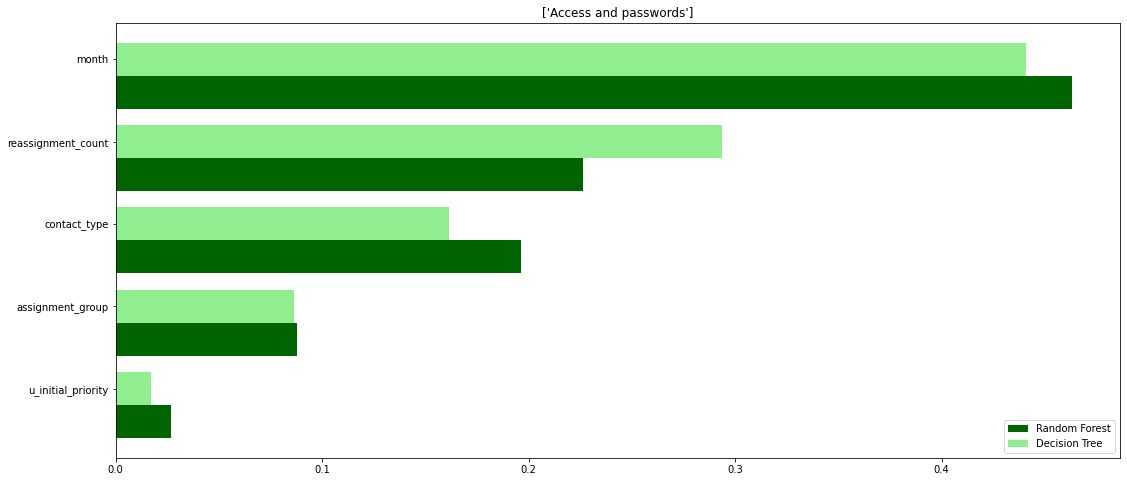

Category: ['Application support']
X_train shape: (1626, 5)
X_test shape: (407, 5)
Y_train shape: (1626,)
Y_test shape: (407,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

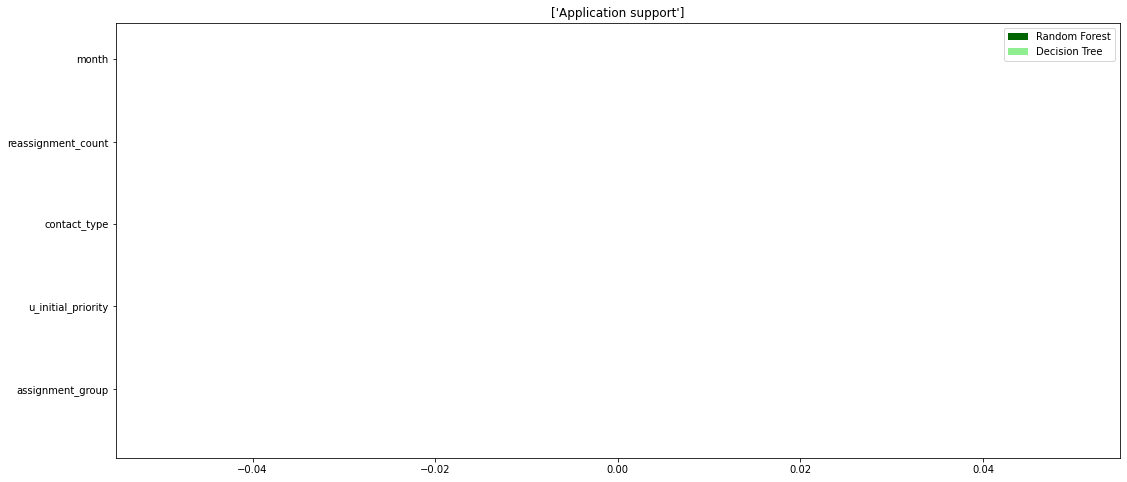

Category: ['Collaboration and content tools']
X_train shape: (51, 5)
X_test shape: (13, 5)
Y_train shape: (51,)
Y_test shape: (13,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

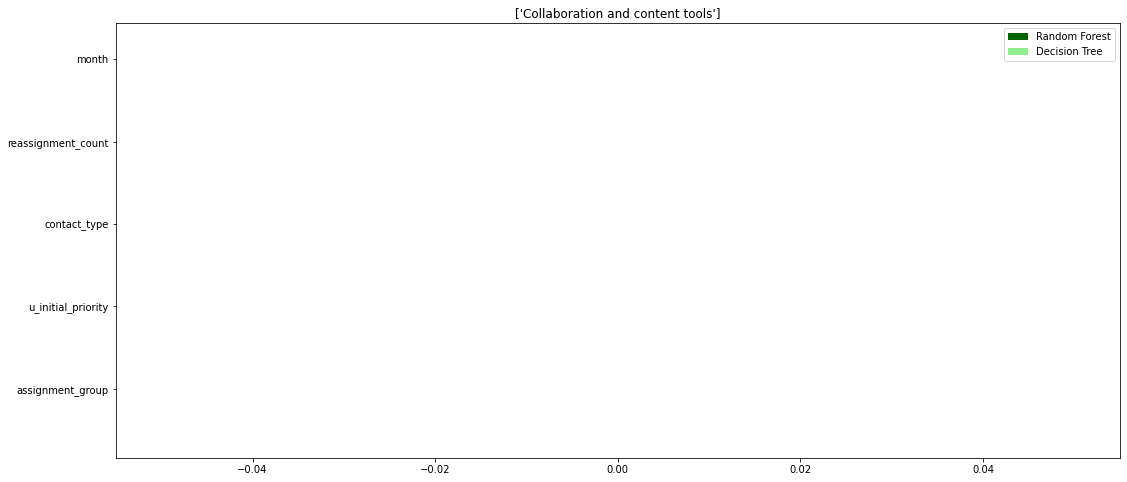

Category: ['Customer Success Business Management']
X_train shape: (1, 5)
X_test shape: (1, 5)
Y_train shape: (1,)
Y_test shape: (1,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

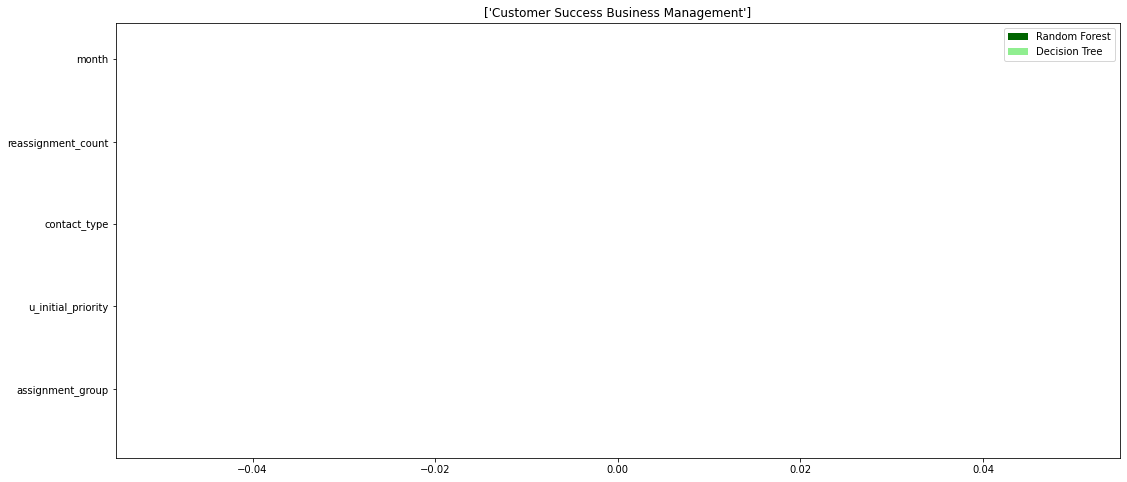

Category: ['Desktop or laptop']
X_train shape: (2776, 5)
X_test shape: (695, 5)
Y_train shape: (2776,)
Y_test shape: (695,)
Decision Tree--
Training Evaluation F1 Score: 0.1322314049586777
Random Forest--
Training Evaluation F1 Score: 0.1322314049586777


<Figure size 432x288 with 0 Axes>

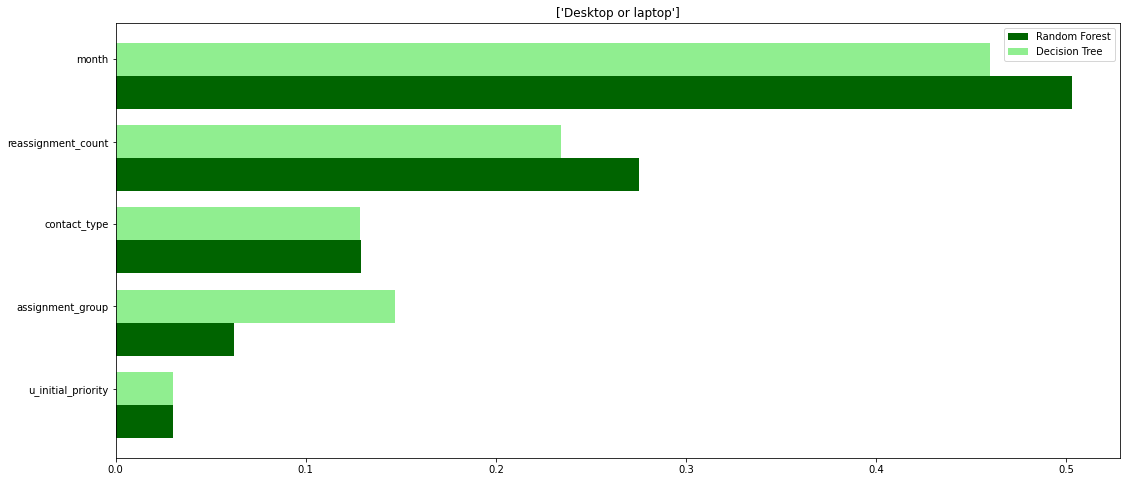

Category: ['Easy connect']
X_train shape: (246, 5)
X_test shape: (62, 5)
Y_train shape: (246,)
Y_test shape: (62,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

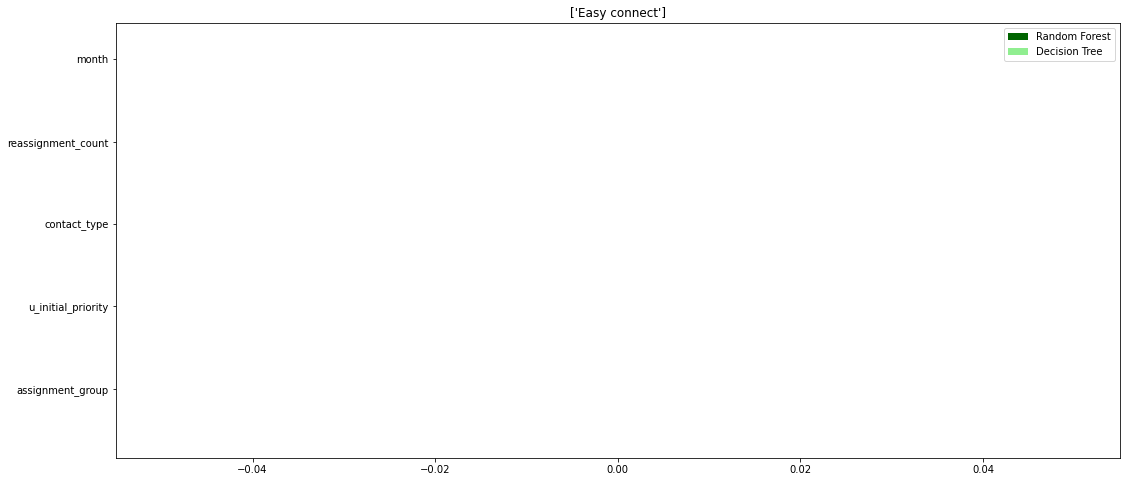

Category: ['Email / Calendar']
X_train shape: (87, 5)
X_test shape: (22, 5)
Y_train shape: (87,)
Y_test shape: (22,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

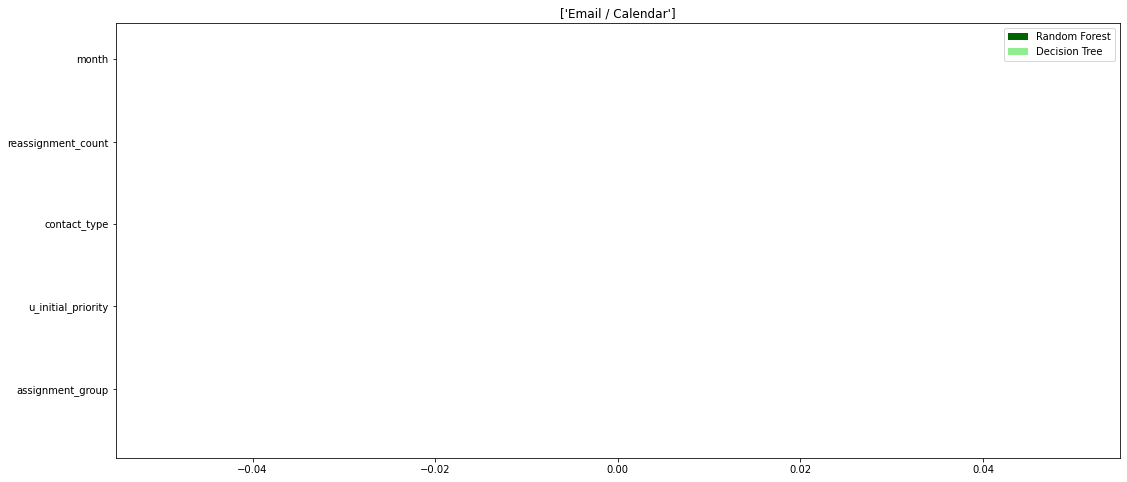

Category: ['Engineering']
X_train shape: (1, 5)
X_test shape: (1, 5)
Y_train shape: (1,)
Y_test shape: (1,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

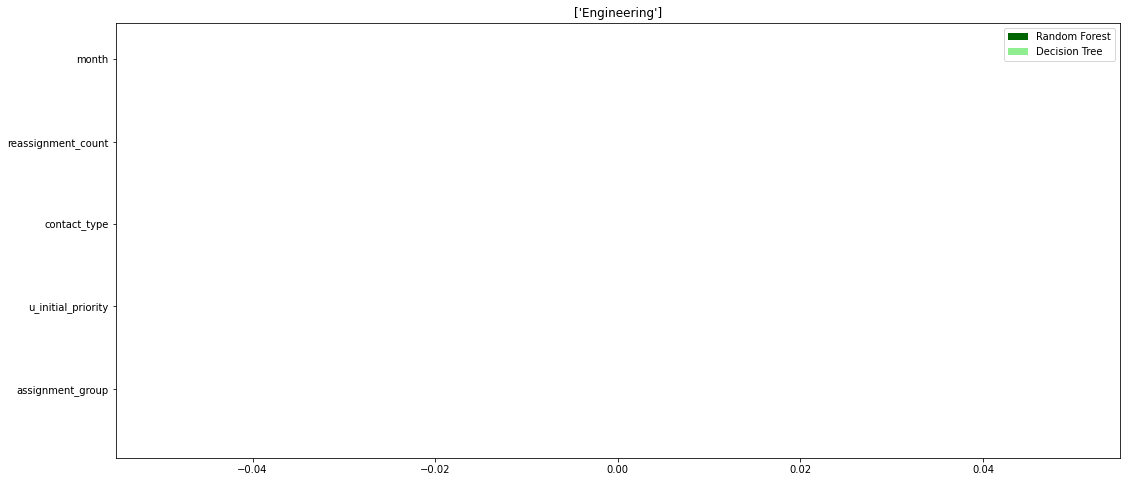

Category: ['Finance']


ValueError: ignored

In [ ]:
for i in (number + 1 for number in range(len(category_map))):
  print('Category:',[cat for cat, n in category_map.items() if n == i])
  m = [cat for cat, n in category_map.items() if n == i]

  #isolate category 1 incidents
  j_inc1 = j_incidents[j_incidents['category']==i]
  j_inc1 = j_inc1.drop(['category','sys_mod_count'], axis=1) #drop column with a lot of cats, along with category


  #run models for category i
  #Split Tasks
  X = j_inc1.drop(columns=['number', 'outlier']).values
  Y = j_inc1['outlier'].values
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

  print('X_train shape:', X_train.shape)
  print('X_test shape:', X_test.shape)
  print('Y_train shape:', Y_train.shape)
  print('Y_test shape:', Y_test.shape)

  #decision tree
  dt= DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
  dt.fit(X_train, Y_train)
  dt_pred_train = dt.predict(X_train)

  print('Decision Tree--')
  print('Training Evaluation F1 Score:', f1_score(Y_train, dt_pred_train))

  #random forest
  rfc= RandomForestClassifier(criterion = 'entropy', random_state = 42)
  rfc.fit(X_train, Y_train)
  rfc_pred_train = rfc.predict(X_train)

  print('Random Forest--')
  print('Training Evaluation F1 Score:', f1_score(Y_train, rfc_pred_train))

  #plot
  feature_importance = pd.DataFrame({
      'rfc':rfc.feature_importances_,
      'dt': dt.feature_importances_
  }, index=j_inc1.drop(columns=['number','outlier']).columns)
  feature_importance.sort_values(by='rfc', ascending=True, inplace=True)

  index = np.arange(len(feature_importance))
  plt.figure(i)
  fig, ax = plt.subplots(figsize=(18,8))
  rfc_feature = ax.barh(index, feature_importance['rfc'], 0.4, color='darkgreen', label='Random Forest')
  dt_feature = ax.barh(index+0.4, feature_importance['dt'], 0.4, color='lightgreen', label='Decision Tree')
  ax.set(yticks=index+0.4, yticklabels=feature_importance.index)
  ax.set_title(m)

  ax.legend()
  plt.show()



## A_Data


In [37]:
#COMPANY A
#read in data

a_data = pd.read_csv('/content/gdrive/Shareddrives/IST 718 Project/a_data_BoolOut.csv') #with boolean indicating outlier
a_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,assignment_group,number,state,priority,short_description,description,comments_and_work_notes,work_notes,close_notes,location,sys_created_on,closed_at,u_initial_response_sla_completed,bus_dur_num,cal_dur_num,reassignment_count,sys_mod_count,assigned_to,closed_by,contact_type,sys_created_by,sla_due,u_task_number_flag,sys_class_name,sys_updated_on,sys_updated_by,urgency,work_start,opened_at,active,comments,closed_by.average_daily_fte,closed_by.city,activity_due,approval,location.city,impact,knowledge,u_reason_to_hold,location.country,location.u_location_id,location.state,location.u_region,u_actual_category,u_actual_subcategory,u_cause,u_cause_code,u_qs_fcresolve,u_misrouted,due_date,sys_domain,task_effective_number,TicketDuration,CalendarDuration,BusinessDuration,category,subcategory,outlier
0,0,0,0,0,I-ACM-SD L1-India,INC1499259,Cancelled,P4,user need to install jet stream viewer,NaN,10-27-2020 13:29:00 - Rajat Kumar (Additional comments)\nIncident is Cancelled and a Request Item RITM0974470 is created.\n\n,NaN,NaN,belfast,2020-10-27 12:50:00,2020-10-27 13:29:00,False,2337,2337,1,1,Rajat Kumar,NaN,Chat,NaN,UNKNOWN,NaN,Incident,2020-10-27 13:29:00,7.0,2,10/27/2020 13:29,2020-10-27 12:50:00,False,10-27-2020 13:29:00 - rajat kumar (additional comments)\nincident is cancelled and a request item ritm0974470 is created.\n\n,NaN,los angeles,UNKNOWN,Not Yet Requested,belfast,3 - Low,False,NaN,united kingdom,GB-GNGBP681-0002/BLDG,county antrim,europe(emea),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 00:39:00,0:38:57,0:38:57,software,software breakfix,False
1,1,3,3,3,I-ACM-CTS-India,INC1498224,Cancelled,P4,need assistance turning on bitlocker,name:sanjay kumar\r\nphone:566539297\r\nemail address:sanjay.kumar4@aecom.com\r\nthe user called in stating his bitlocker is switched off on his computer and needs to switch it on \r\ntook remote ...,10-27-2020 12:22:04 - Kaveri S (Additional comments)\nIncident is Cancelled and a Request Item RITM0974445 is created.\n\n10-27-2020 12:21:54 - Kaveri S (Work notes)\nmcafee is installed on the c...,10-27-2020 12:21:54 - Kaveri S (Work notes)\nmcafee is installed on the computer\r\nbit locker is not enabled\r\ncreating a request ticket to remove mcafee\r\n\r\nKB0033325\n\n10-27-2020 12:20:37 ...,NaN,"riyadh, SA",2020-10-27 00:29:00,2020-10-27 12:22:00,False,1324,42739,1,12,Kaveri S,NaN,Phone,9.0,UNKNOWN,NaN,Incident,2020-10-27 12:22:00,9.0,2,10/27/2020 0:33,2020-10-27 00:29:00,False,10-27-2020 12:22:04 - kaveri s (additional comments)\nincident is cancelled and a request item ritm0974445 is created.\n\n10-27-2020 00:29:45 - abdul baig (additional comments)\nname:sanjay kumar...,NaN,los angeles,UNKNOWN,Not Yet Requested,riyadh,3 - Low,False,NaN,saudi arabia,NaN,NaN,middle east (emea),security,bitlocker - break/fix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 11:53:00,11:52:19,0:22:04,security,bitlocker - break/fix,False
2,2,4,4,4,I-ACM-SD Self Serv,INC1498051,Cancelled,P4,unable to obtain autocad license at home,description: i am trying to obtain a license for autocad at home. it pops up with an error message saying one cannot be borrowed this time and to contact my system administrator.,10-27-2020 02:58:38 - Sakshi Srivastava (Additional comments)\nIncident is Cancelled and a Request Item RITM0973929 is created.\n\n,NaN,NaN,perth,2020-10-26 20:12:00,2020-10-27 02:58:00,False,0,24359,0,2,Sakshi Srivastava,NaN,Self-service,1.0,UNKNOWN,NaN,Incident,2020-10-27 02:58:00,9.0,3,10/26/2020 20:30,2020-10-26 20:12:00,False,10-27-2020 02:58:38 - sakshi srivastava (additional comments)\nincident is cancelled and a request item ritm0973929 is created.\n\n,NaN,los angeles,UNKNOWN,Not Yet Requested,perth,3 - Low,False,NaN,australia,NaN,western australia,australia new zealand (apac),software,software breakfix,NaN,NaN,False,False,NaN,NaN,NaN,0 days 06:46:00,6:45:59,0:00:00,software,software breakfix,False
3,3,6,6,6,I-ACM-CTS-India,INC1497739,Cancell

In [45]:
a_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'assignment_group', 'number', 'state', 'priority', 'short_description',
       'description', 'comments_and_work_notes', 'work_notes', 'close_notes',
       'location', 'sys_created_on', 'closed_at',
       'u_initial_response_sla_completed', 'bus_dur_num', 'cal_dur_num',
       'reassignment_count', 'sys_mod_count', 'assigned_to', 'closed_by',
       'contact_type', 'sys_created_by', 'sla_due', 'u_task_number_flag',
       'sys_class_name', 'sys_updated_on', 'sys_updated_by', 'urgency',
       'work_start', 'opened_at', 'active', 'comments',
       'closed_by.average_daily_fte', 'closed_by.city', 'activity_due',
       'approval', 'location.city', 'impact', 'knowledge', 'u_reason_to_hold',
       'location.country', 'location.u_location_id', 'location.state',
       'location.u_region', 'u_actual_category', 'u_actual_subcategory',
       'u_cause', 'u_cause_code', 'u_qs_fcresolve', 'u_misrouted', 'due_da

In [57]:

keep_columns = ['number', 'opened_at', 'category', 'assignment_group', 'priority', 'sys_mod_count', 
                'contact_type', 'bus_dur_num', 'assigned_to', 'subcategory', 'reassignment_count',
                'BusinessDuration', 'outlier'] #use these columns for analysis

#add month, day, and time of day columns
j_brief = a_data[keep_columns]
j_brief['opened_at'] = pd.to_datetime(j_brief['opened_at'], errors = 'coerce')
j_brief['month'] = j_brief['opened_at'].dt.month #get month 0-12
j_brief['day'] = j_brief['opened_at'].dt.weekday #get day 0-31
j_brief['hour'] = j_brief['opened_at'].dt.hour #get hour 0-24
j_brief = j_brief.drop('opened_at', axis=1)
j_brief['u_initial_priority'] = j_brief['priority']


#split incidents/tasks
num_list = j_brief['number']
check = 'T'
task_list = [idx for idx in num_list if idx[0].lower() == check.lower()]
j_tasks = j_brief[j_brief['number'].isin(task_list)] #isolate tasks
check = 'I'
task_list = [idx for idx in num_list if idx[0].lower() == check.lower()]
j_incidents = j_brief[j_brief['number'].isin(task_list)] #isolate incidents


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [44]:
#Prepare Categorical Variable Encoding
print('Unique Values of Priority in Incidents')
print(np.unique(j_incidents['u_initial_priority']))

print('-----------------------------------')
print('Unique Values of Sys_Mod_Count in Incidents')
print(np.unique(j_incidents['sys_mod_count']))

print('-----------------------------------')
print('Unique Values of Contact Type in Incidents')
print(np.unique(j_incidents['contact_type'].astype(str)))

print('-----------------------------------')
print('Unique Values of Assigned User in Incidents')
print(np.unique(j_incidents['assigned_to'].astype(str)))

print('-----------------------------------')
print('Unique Values of Reassignment Count in Incidents')
print(np.unique(j_incidents['reassignment_count']))

print('-----------------------------------')
print('Unique Values of Subcategory in Incidents')
print(np.unique(j_incidents['subcategory']))

print('-----------------------------------')
print('Unique Values of Category in Incidents')
print(np.unique(j_incidents['category'].astype(str)))

print('-----------------------------------')
print('Unique Values of Assignment Group in Incidents')
print(np.unique(j_incidents['assignment_group']))

print('-----------------------------------')


Unique Values of Priority in Incidents
['P1' 'P2' 'P3' 'P4']
-----------------------------------
Unique Values of Sys_Mod_Count in Incidents
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  87  88  89  90
  91  92  93  94  97  98  99 101 102 105 107 109 118 122 126 136 144 148
 203 205]
-----------------------------------
Unique Values of Contact Type in Incidents
['Autoticketing AT&T' 'Autoticketing Dynamic Automation'
 'Autoticketing NetCool' 'Autoticketing Orion' 'Chat' 'Email'
 'Event Management' 'External Service Desk' 'Phone' 'Self-service'
 'Service Catalog' 'Walk-in' 'Walk-up' 'nan']
-----------------------------------
Unique Values of Assigned User in Incidents
['Aakash Pandey' 'Aa

In [59]:
to_keep

['number',
 'priority',
 'sys_mod_count',
 'bus_dur_num',
 'reassignment_count',
 'BusinessDuration',
 'outlier',
 'hour',
 'y',
 'category_access-issue/request',
 'category_application-issue/request',
 'category_backup and restore',
 'category_chat',
 'category_computer hardware',
 'category_email',
 'category_general',
 'category_hardware asset management',
 'category_network',
 'category_phone and mobile',
 'category_printer and fax',
 'category_security',
 'category_software',
 'category_software asset management',
 'category_video conferencing / webex',
 'category_workstation/ computer - software',
 'assignment_group_I-ACM-CTS-India',
 'assignment_group_I-ACM-DS-NA-US-CC-NY-EXECSUPP',
 'assignment_group_I-ACM-DS-NA-US-DISPATCH',
 'assignment_group_I-ACM-DS-NA-US-NORTHEAST',
 'assignment_group_I-ACM-DS-NA-US-NORTHWEST',
 'assignment_group_I-ACM-DS-NA-US-SOUTHEAST',
 'assignment_group_I-ACM-DS-NA-US-San Fran-EXECSUPP',
 'assignment_group_I-ACM-DS-NA-US-Shared',
 'assignment_group_I-

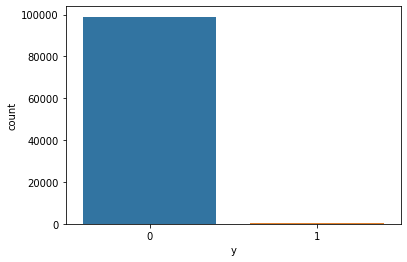

In [60]:
data_final=j_incidents[to_keep]
len(data_final.columns.values)

data_final = data_final.drop(['number','sys_mod_count', 'bus_dur_num', 'reassignment_count', 'BusinessDuration', 'outlier', 'hour'], axis=1)
data_final

sns.countplot(x='y', data=j_incidents)
plt.show()


In [61]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
#ID variables to use

colsup = {}
count = 0

for col in data_final.columns.values:
  colsup[col] = rfe.support_[count]
  count = count + 1

colsup

logvars = []
for key, value in colsup.items():
  if value == True:
    logvars.append(key)

logvars

 
X=os_data_X[logvars]
y=os_data_y['y']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

[False  True False False  True False False False False False False False
 False False False False False  True False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False  True False False False False  True
  True  True  True False False False False False  True False False False
 False  True False False False  True False False False False False False
 False False False False  True  True False False False False False  True
 False False False False  True False False False False False False False
 False False  True False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

IndexError: ignored

In [63]:
data_final = data_final.drop('priority', axis=1)
data_final

,y,category_access-issue/request,category_application-issue/request,category_backup and restore,category_chat,category_computer hardware,category_email,category_general,category_hardware asset management,category_network,category_phone and mobile,category_printer and fax,category_security,category_software,category_software asset management,category_video conferencing / webex,category_workstation/ computer - software,assignment_group_I-ACM-CTS-India,assignment_group_I-ACM-DS-NA-US-CC-NY-EXECSUPP,assignment_group_I-ACM-DS-NA-US-DISPATCH,assignment_group_I-ACM-DS-NA-US-NORTHEAST,assignment_group_I-ACM-DS-NA-US-NORTHWEST,assignment_group_I-ACM-DS-NA-US-SOUTHEAST,assignment_group_I-ACM-DS-NA-US-San Fran-EXECSUPP,assignment_group_I-ACM-DS-NA-US-Shared,assignment_group_I-ACM-SD L1-India,assignment_group_I-ACM-SD Self Serv,u_initial_priority_P1,u_initial_priority_P2,u_initial_priority_P3,u_initial_priority_P4,contact_type_Autoticketing AT&T,contact_type_Autoticketing Dynamic Automation,contact_type_Autoticketing NetCool,contact_type_Autoticketing Orion,contact_type_Chat,contact_type_Email,contact_type_Event Management,contact_type_External Service Desk,contact_type_Phone,...,subcategory_vpn - globalprotect - break/fix,subcategory_vpn - globalprotect - install/how to/configuration,subcategory_vpn / 2fa-break/fix,subcategory_vpn / 2fa-set up,subcategory_vpn 2fa - access request,subcategory_vpn 2fa - anyconnect how to,subcategory_vpn 2fa - anyconnect install,subcategory_vpn 2fa - registration,subcategory_vpn-error,subcategory_web browser - configuration,subcategory_web browser/ internet-break/fix,subcategory_web vpn,subcategory_web_browser _configuration,subcategory_webex - setup/configuration,subcategory_webex-break / fix,subcategory_webex-request,subcategory_website access-unblock / whitelist,subcategory_wifi - no connectivity,subcategory_windows 10,subcategory_workday - break/fix,subcategory_workday/myhr referral,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99322,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
99323,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
99324,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99325,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [64]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


length of oversampled data is  138518
Number of no subscription in oversampled data 69259
Number of subscription 69259
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [65]:
X=os_data_X[logvars]
y=os_data_y['y']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

KeyError: ignored

In [58]:
#assignment_group
assignmentgroup_map = {'I-ACM-CTS-India':1, 'I-ACM-DS-NA-US-CC-NY-EXECSUPP':2,
 'I-ACM-DS-NA-US-DISPATCH':3, 'I-ACM-DS-NA-US-NORTHEAST':4,
 'I-ACM-DS-NA-US-NORTHWEST':5, 'I-ACM-DS-NA-US-SOUTHEAST':6,
 'I-ACM-DS-NA-US-San Fran-EXECSUPP':7, 'I-ACM-DS-NA-US-Shared':8,
 'I-ACM-SD L1-India':9, 'I-ACM-SD Self Serv':10}
#contact_type
contacttype_map = {'Autoticketing AT&T':1, 'Autoticketing Dynamic Automation':2,
 'Autoticketing NetCool':3, 'Autoticketing Orion':4, 'Chat':5, 'Email':6,
 'Event Management':7, 'External Service Desk':8, 'Phone':9, 'Self-service':10,
 'Service Catalog':11, 'Walk-in':12, 'Walk-up':13 }
#category
category_map = {'access-issue/request':1, 'application-issue/request':2, 'backup and restore':3,
 'chat':4, 'computer hardware':5, 'email':6, 'general':7, 'hardware asset management':8,
 'network':9, 'phone and mobile':10, 'printer and fax':11, 'security':12,
 'software':13, 'software asset management':14, 'video conferencing / webex':15,
 'workstation/ computer - software':16}
#outlier
outlier_map = {True:1, False:0}
#u_initial_priority
priority_map = {'P1':1,'P2':2, 'P3':3, 'P4':4}

'''#incidents
j_incidents['u_initial_priority'] = j_incidents['u_initial_priority'].map({'P1':1,'P2':2, 'P3':3, 'P4':4})
j_incidents['outlier'] = j_incidents['outlier'].map(outlier_map)
j_incidents['assignment_group'] = j_incidents['assignment_group'].map(assignmentgroup_map)
j_incidents['contact_type'] = j_incidents['contact_type'].map(contacttype_map)
j_incidents['category'] = j_incidents['category'].map(category_map)
'''

j_incidents['y'] = j_incidents['outlier'].map(outlier_map)

#Dummy Variables
cat_vars=['category', 'assignment_group', 'u_initial_priority',
       'contact_type', 'assigned_to',
       'subcategory', 
       'month', 'day']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(j_incidents[var], prefix=var)
    data1=j_incidents.join(cat_list)
    j_incidents=data1
cat_vars=['category', 'assignment_group', 'u_initial_priority',
       'contact_type', 'assigned_to',
       'subcategory', 
       'month', 'day']
data_vars=j_incidents.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]



In [ ]:
#j_incidents['u_initial_priority'] = j_incidents.replace({np.nan:j_incidents['u_initial_priority'].mode()}) #replace with mode

#look for NaN values
print(j_incidents.isnull().sum())


print('The length of Incidents is:')
print(len(j_incidents))


number                   0
category                 6
assignment_group         0
priority                 0
sys_mod_count            0
contact_type          3828
bus_dur_num              0
assigned_to           1207
subcategory              0
reassignment_count       0
BusinessDuration         0
outlier                  0
month                    0
day                      0
hour                     0
u_initial_priority       0
dtype: int64
The length of Incidents is:
99327


In [ ]:
#remove other NaN rows since so few observations
j_incidents = j_incidents.dropna(axis=0)


print('The length of Incidents is:')
print(len(j_incidents))


print(j_incidents.isnull().sum())


The length of Incidents is:
94304
number                0
category              0
assignment_group      0
priority              0
sys_mod_count         0
contact_type          0
bus_dur_num           0
assigned_to           0
subcategory           0
reassignment_count    0
BusinessDuration      0
outlier               0
month                 0
day                   0
hour                  0
u_initial_priority    0
dtype: int64


In [ ]:
j_incidents = j_incidents.drop(['assigned_to', 'subcategory', 'BusinessDuration', 'bus_dur_num', 'hour', 'day', 'priority'], axis=1) #drop since too many cats


In [ ]:
#make sure DF is ready
j_incidents

,number,category,assignment_group,sys_mod_count,contact_type,reassignment_count,outlier,month,u_initial_priority
0,INC1499259,13.0,9,1,5.0,1,0,10,4
1,INC1498224,12.0,1,12,9.0,1,0,10,4
2,INC1498051,13.0,10,2,10.0,0,0,10,4
3,INC1497739,16.0,1,1,9.0,0,0,10,4
4,INC1497518,13.0,9,1,5.0,0,0,10,4
...,...,...,...,...,...,...,...,...,...
99322,INC0500144,5.0,1,18,9.0,6,0,8,4
99323,INC0441177,7.0,6,15,9.0,5,0,6,4
99324,INC0437667,6.0,9,20,10.0,5,0,6,3
99325,INC0337395,7.0,5,12,10.0,3,0,3,4


In [ ]:
for i in (number + 1 for number in range(len(category_map))):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


Category: ['access-issue/request']
X_train shape: (33107, 5)
X_test shape: (8277, 5)
Y_train shape: (33107,)
Y_test shape: (8277,)
Decision Tree--
Training Evaluation F1 Score: 0.042553191489361694
Random Forest--
Training Evaluation F1 Score: 0.042553191489361694


<Figure size 432x288 with 0 Axes>

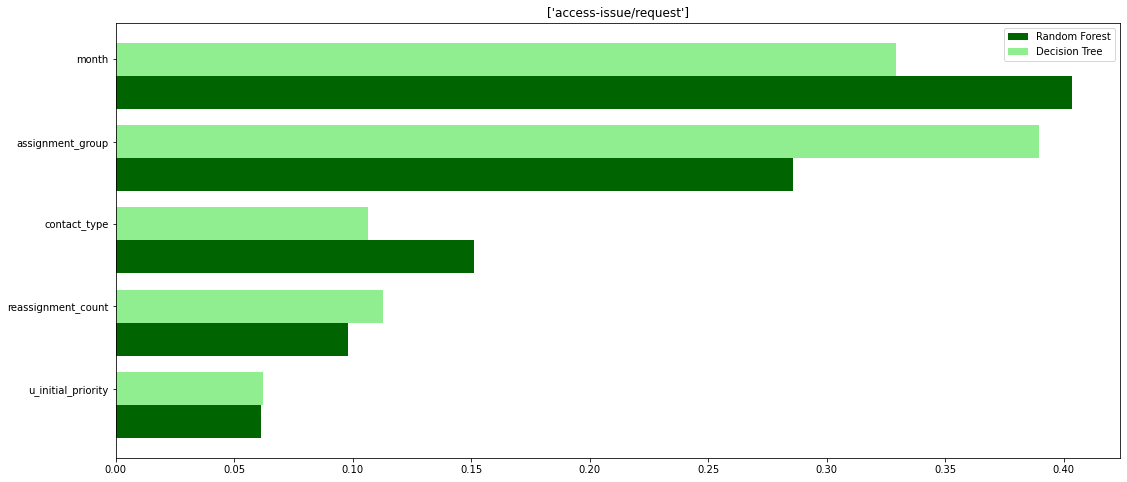

Category: ['application-issue/request']
X_train shape: (9378, 5)
X_test shape: (2345, 5)
Y_train shape: (9378,)
Y_test shape: (2345,)
Decision Tree--
Training Evaluation F1 Score: 0.17948717948717952
Random Forest--
Training Evaluation F1 Score: 0.19999999999999998


<Figure size 432x288 with 0 Axes>

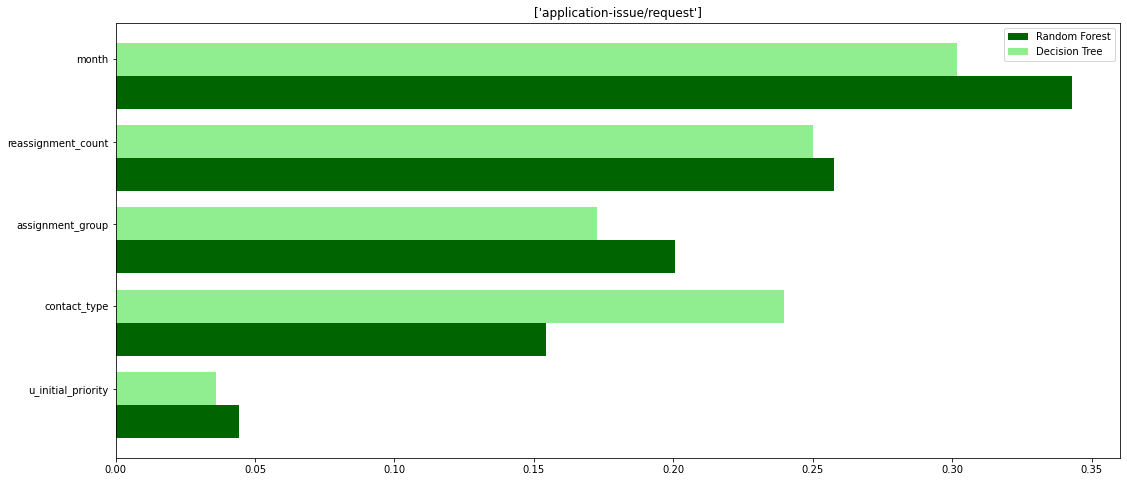

Category: ['backup and restore']
X_train shape: (138, 5)
X_test shape: (35, 5)
Y_train shape: (138,)
Y_test shape: (35,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

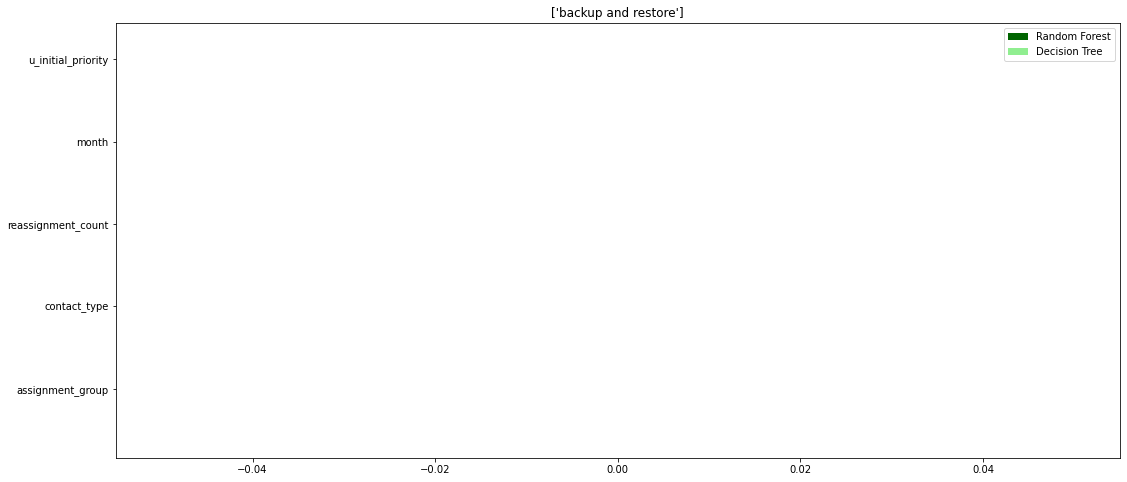

Category: ['chat']
X_train shape: (352, 5)
X_test shape: (89, 5)
Y_train shape: (352,)
Y_test shape: (89,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

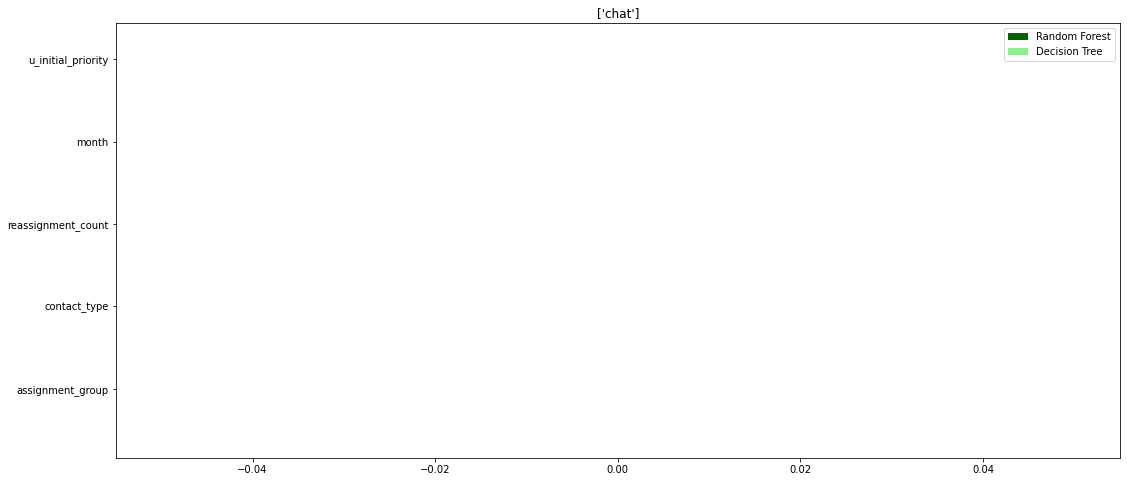

Category: ['computer hardware']
X_train shape: (3516, 5)
X_test shape: (879, 5)
Y_train shape: (3516,)
Y_test shape: (879,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


<Figure size 432x288 with 0 Axes>

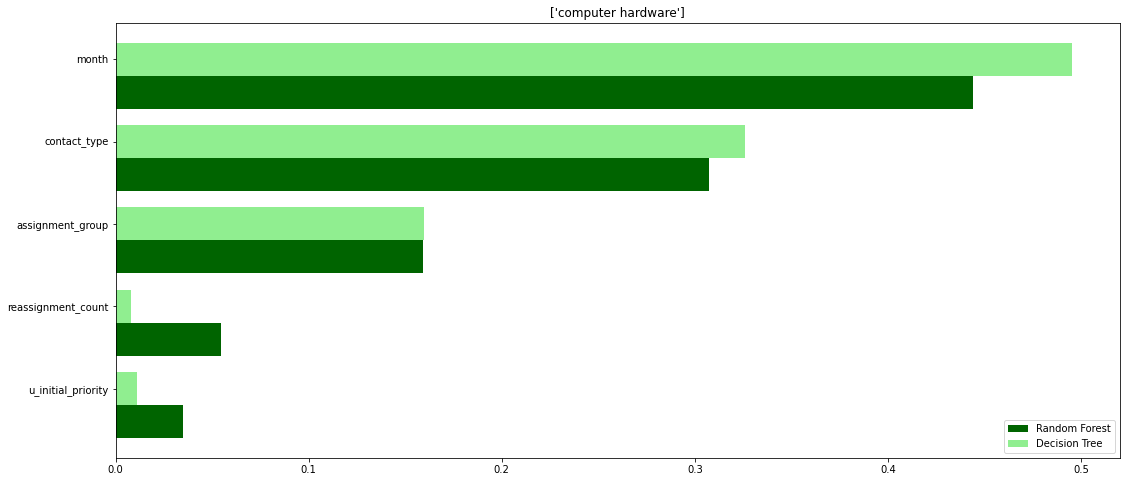

Category: ['email']
X_train shape: (3452, 5)
X_test shape: (864, 5)
Y_train shape: (3452,)
Y_test shape: (864,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

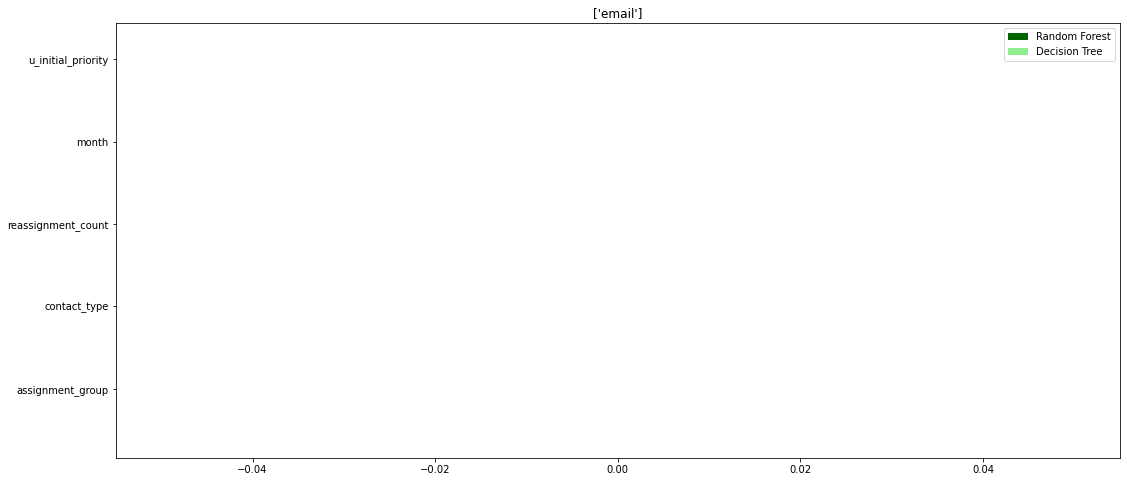

Category: ['general']
X_train shape: (3082, 5)
X_test shape: (771, 5)
Y_train shape: (3082,)
Y_test shape: (771,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

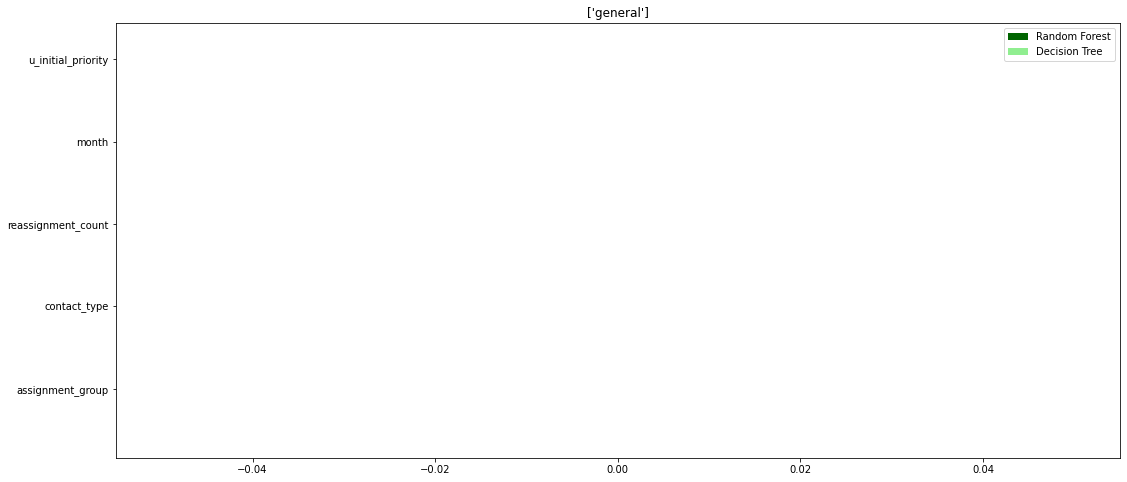

Category: ['hardware asset management']
X_train shape: (5, 5)
X_test shape: (2, 5)
Y_train shape: (5,)
Y_test shape: (2,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

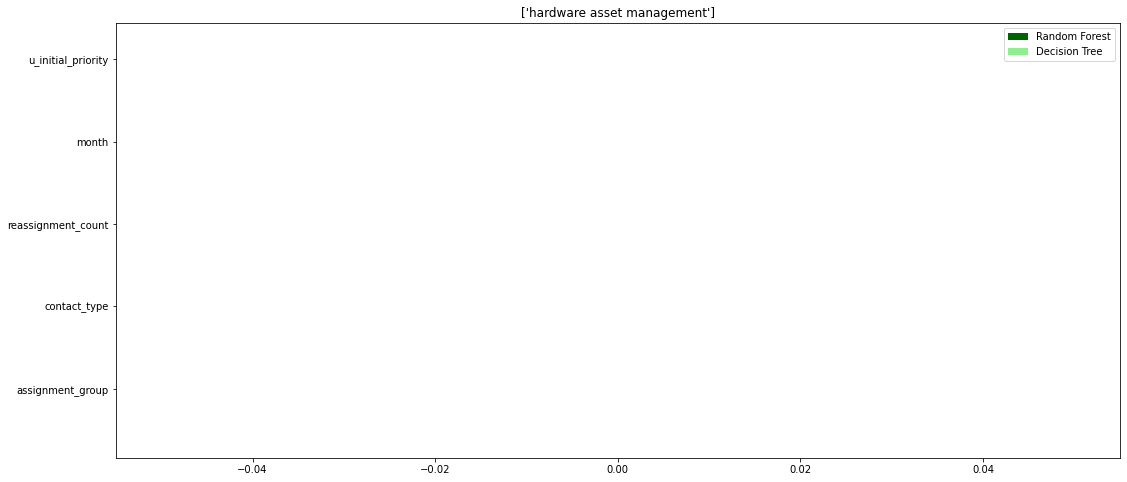

Category: ['network']
X_train shape: (1774, 5)
X_test shape: (444, 5)
Y_train shape: (1774,)
Y_test shape: (444,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

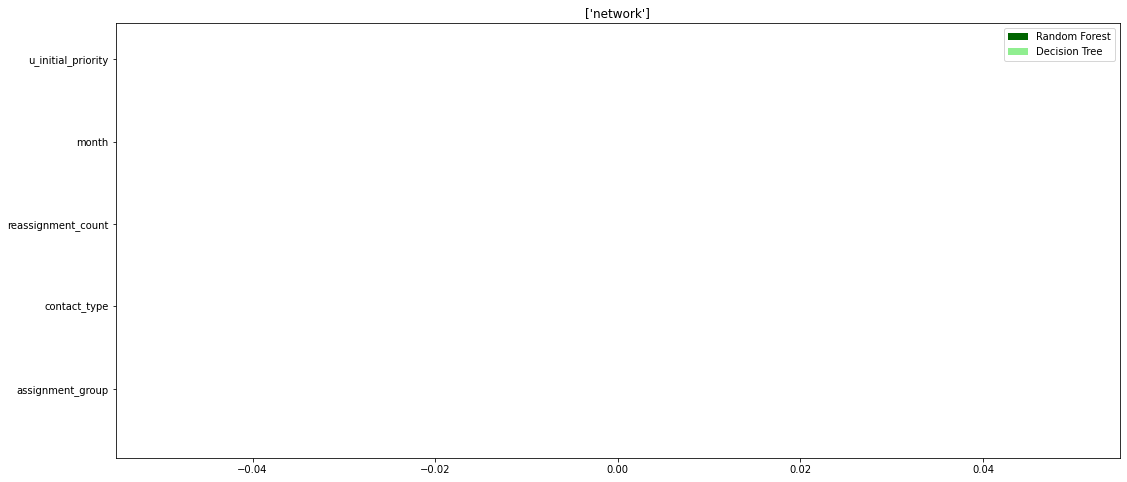

Category: ['phone and mobile']
X_train shape: (720, 5)
X_test shape: (180, 5)
Y_train shape: (720,)
Y_test shape: (180,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

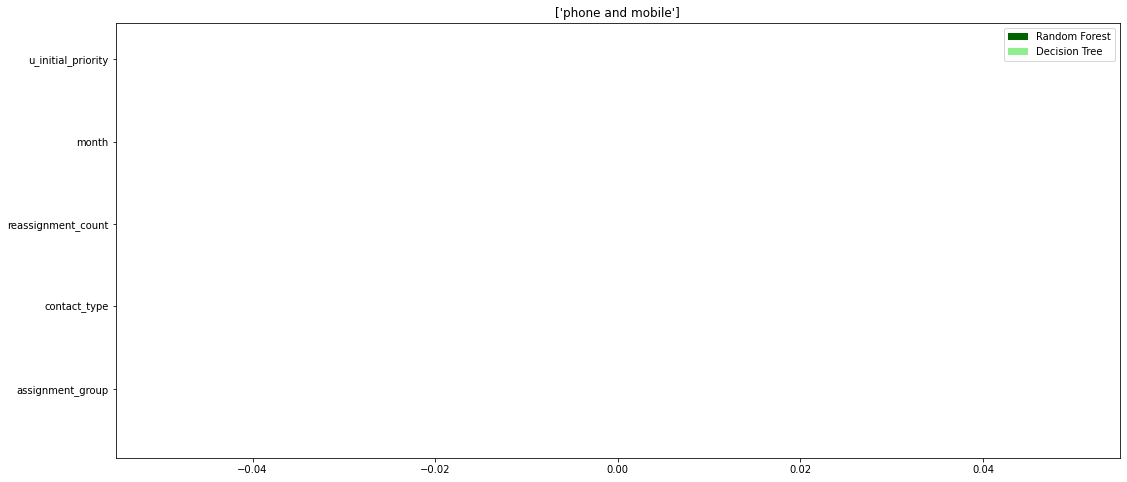

Category: ['printer and fax']
X_train shape: (1563, 5)
X_test shape: (391, 5)
Y_train shape: (1563,)
Y_test shape: (391,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

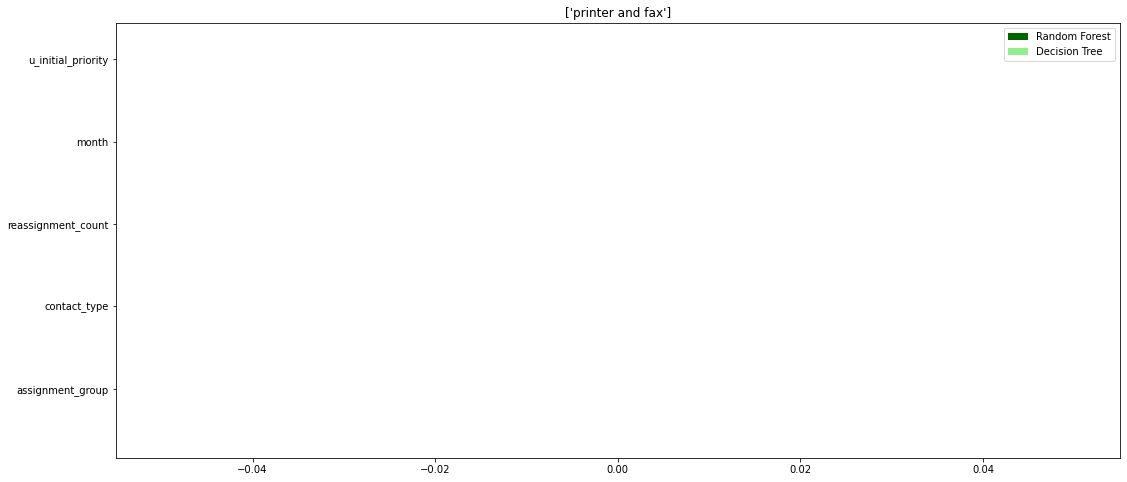

Category: ['security']
X_train shape: (1043, 5)
X_test shape: (261, 5)
Y_train shape: (1043,)
Y_test shape: (261,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

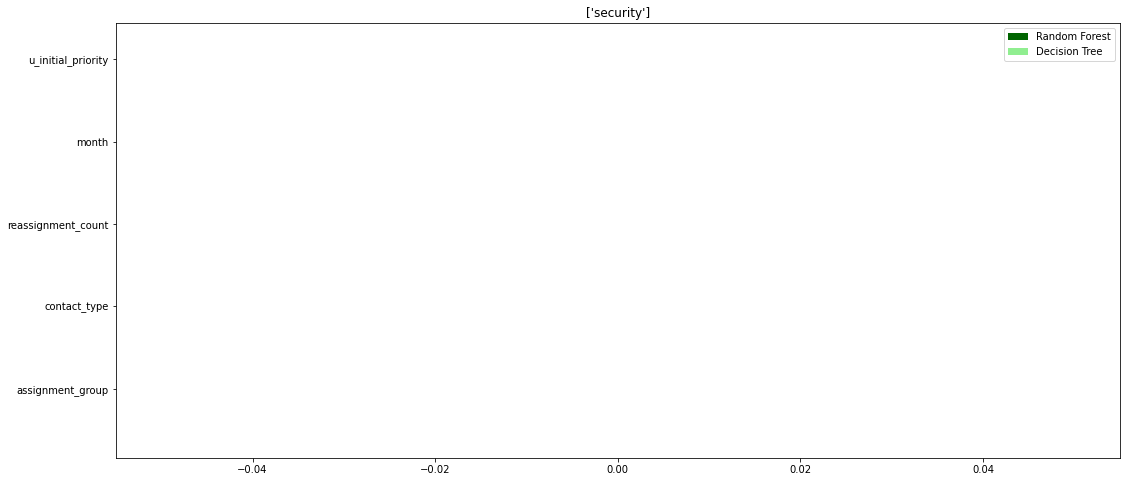

Category: ['software']
X_train shape: (15188, 5)
X_test shape: (3798, 5)
Y_train shape: (15188,)
Y_test shape: (3798,)
Decision Tree--
Training Evaluation F1 Score: 0.2537313432835821
Random Forest--
Training Evaluation F1 Score: 0.2753623188405797


<Figure size 432x288 with 0 Axes>

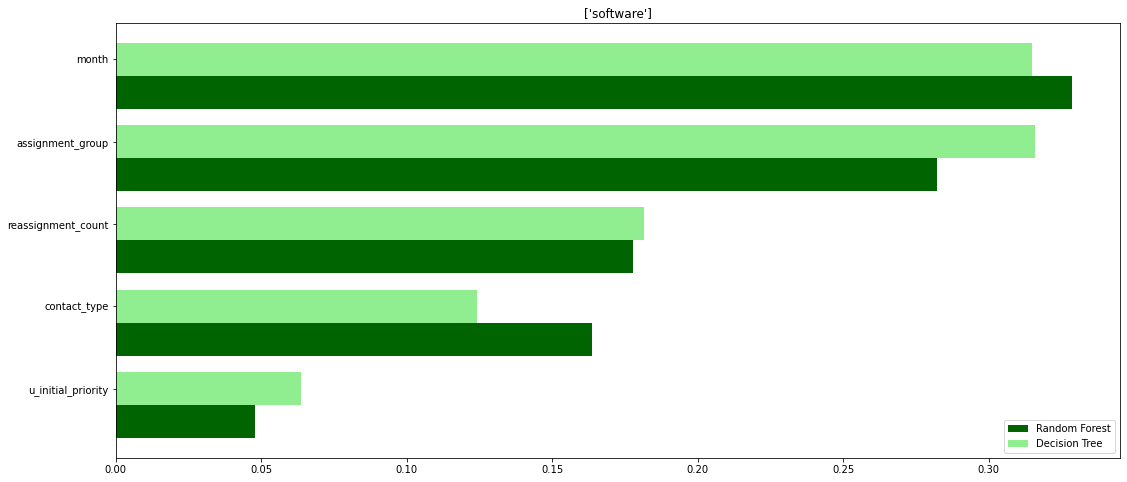

Category: ['software asset management']
X_train shape: (288, 5)
X_test shape: (72, 5)
Y_train shape: (288,)
Y_test shape: (72,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

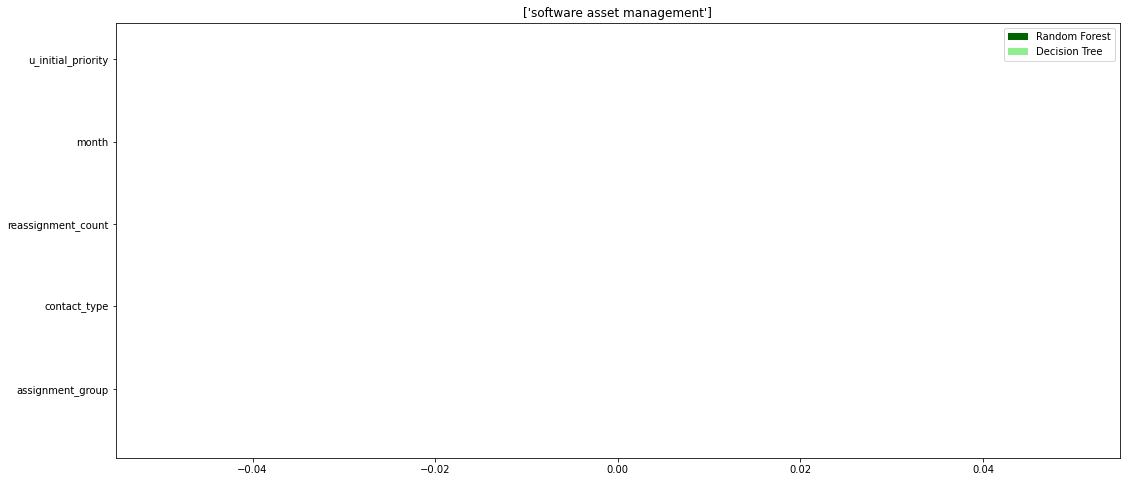

Category: ['video conferencing / webex']
X_train shape: (252, 5)
X_test shape: (63, 5)
Y_train shape: (252,)
Y_test shape: (63,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

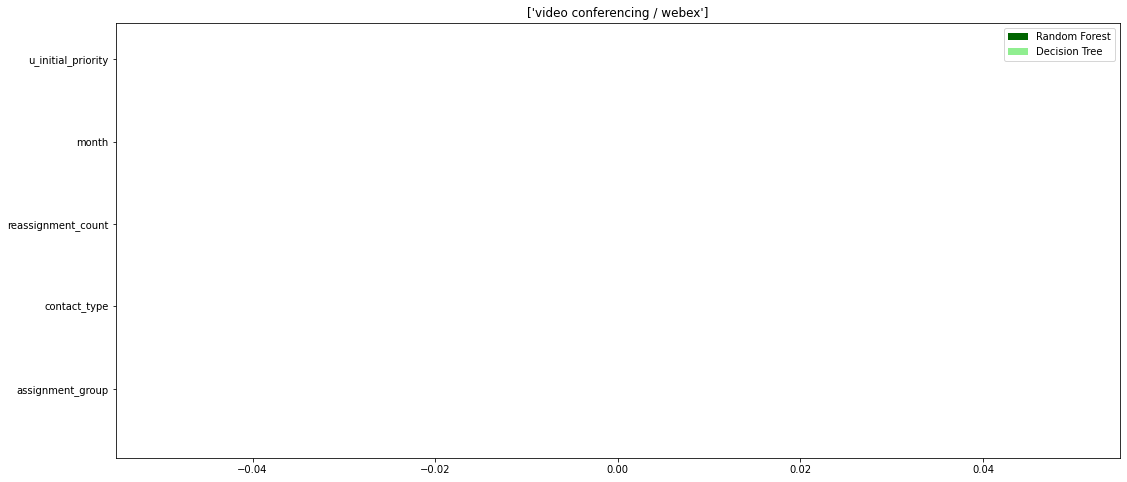

Category: ['workstation/ computer - software']
X_train shape: (1580, 5)
X_test shape: (395, 5)
Y_train shape: (1580,)
Y_test shape: (395,)
Decision Tree--
Training Evaluation F1 Score: 0.0
Random Forest--
Training Evaluation F1 Score: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


<Figure size 432x288 with 0 Axes>

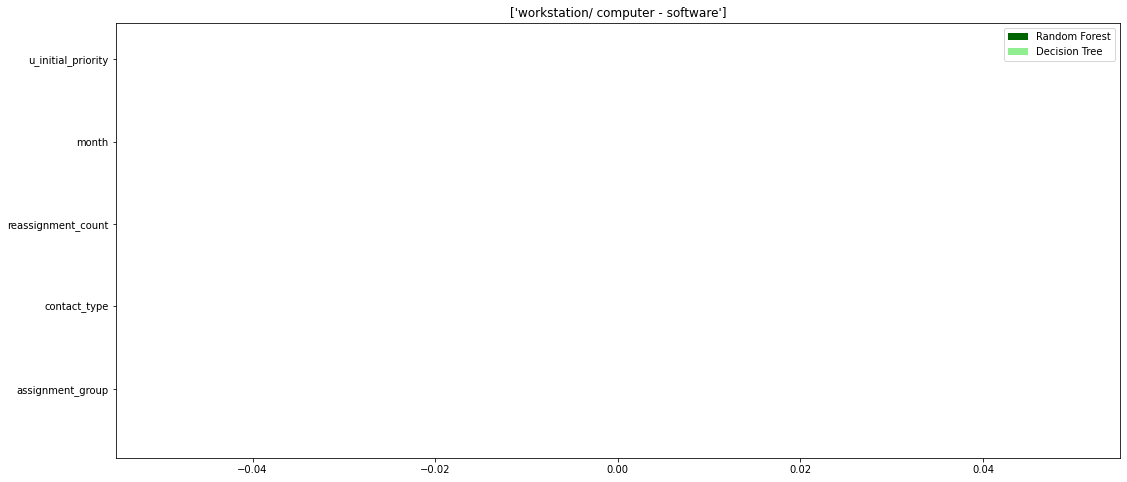

In [ ]:
for i in (number + 1 for number in range(len(category_map))):
  print('Category:',[cat for cat, n in category_map.items() if n == i])
  m = [cat for cat, n in category_map.items() if n == i]

  #isolate category 1 incidents
  j_inc1 = j_incidents[j_incidents['category']==i]
  j_inc1 = j_inc1.drop(['category','sys_mod_count'], axis=1) #drop column with a lot of cats, along with category


  #run models for category i
  #Split Tasks
  X = j_inc1.drop(columns=['number', 'outlier']).values
  Y = j_inc1['outlier'].values
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

  print('X_train shape:', X_train.shape)
  print('X_test shape:', X_test.shape)
  print('Y_train shape:', Y_train.shape)
  print('Y_test shape:', Y_test.shape)

  #decision tree
  dt= DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
  dt.fit(X_train, Y_train)
  dt_pred_train = dt.predict(X_train)

  print('Decision Tree--')
  print('Training Evaluation F1 Score:', f1_score(Y_train, dt_pred_train))

  #random forest
  rfc= RandomForestClassifier(criterion = 'entropy', random_state = 42)
  rfc.fit(X_train, Y_train)
  rfc_pred_train = rfc.predict(X_train)

  print('Random Forest--')
  print('Training Evaluation F1 Score:', f1_score(Y_train, rfc_pred_train))

  #plot
  feature_importance = pd.DataFrame({
      'rfc':rfc.feature_importances_,
      'dt': dt.feature_importances_
  }, index=j_inc1.drop(columns=['number','outlier']).columns)
  feature_importance.sort_values(by='rfc', ascending=True, inplace=True)

  index = np.arange(len(feature_importance))
  plt.figure(i)
  fig, ax = plt.subplots(figsize=(18,8))
  rfc_feature = ax.barh(index, feature_importance['rfc'], 0.4, color='darkgreen', label='Random Forest')
  dt_feature = ax.barh(index+0.4, feature_importance['dt'], 0.4, color='lightgreen', label='Decision Tree')
  ax.set(yticks=index+0.4, yticklabels=feature_importance.index)
  ax.set_title(m)

  ax.legend()
  plt.show()

